In [1]:
from scipy import stats
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import h5netcdf
import datetime
import numpy as np
import glob
import matplotlib.animation as animation
from datetime import datetime,timedelta
import plotly.express as px
import plotly.graph_objects as go
import os
import pickle
import matplotlib
import matplotlib.patches as patches
import multiprocessing
from multiprocessing import Pool
import dask.array as da
import itertools
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.signal import welch
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
from datetime import datetime
import os

import numpy as np
import xarray as xr
import pandas as pd
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspecX
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.geoaxes as crs_geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import shapely.geometry as sgeom
import copy
import seaborn as sns
from sklearn.neighbors import KernelDensity
import pickle
from datetime import datetime, timedelta


In [2]:
m_list = ['MAM','JJA','SON','DJF']
s_list = m_list[0]
s_dict = {'MAM':[3,4,5],'JJA':[6,7,8],'SON':[9,10,11],'DJF':[1,2,12]}
sd_dict = {'MAM':92,'JJA':92,'SON':91,'DJF':90}

In [3]:
# Define the start and end years
start_year = 2004
end_year = 2017

# Create an empty list to store the dates
dates_list = []

# Iterate through the years
for year in range(start_year, end_year + 1):
    # Define the range of months to be considered: June, July, and August
    for month in s_dict[s_list]:  # June (6), July (7), August (8)
        # Create a date range for the current month of the current year, correctly handling days
        month_dates = pd.date_range(start=f"{year}-{month:02d}-01", 
                                    end=f"{year}-{month:02d}-{pd.Timestamp(f'{year}-{month:02d}').days_in_month}", 
                                    freq='D')
        # Append the dates to the list
        dates_list.extend(month_dates)

date_list = pd.to_datetime(dates_list)

# Print the total number of dates in the list and the first few dates
print(f"Total dates: {len(dates_list)}")
  # Display first 10 dates to check

Total dates: 1288


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Total days: 5110
Feb 29 present: False
First few dates: DatetimeIndex(['2004-01-01', '2004-01-02', '2004-01-03', '2004-01-04',
               '2004-01-05'],
              dtype='datetime64[ns]', freq=None)
Total JJA days: 1288
Date_JJA[0:2]: DatetimeIndex(['2004-03-01', '2004-03-02'], dtype='datetime64[ns]', freq=None)
BI shape: (5110,)
BI JJA shape: (1288,)
BAM_event_all shape: 1000
3
2009-03-02 00:00:00
5
2010-05-02 00:00:00
4
2012-04-26 00:00:00
3
2017-03-07 00:00:00
4
2016-04-03 00:00:00
3
2012-03-20 00:00:00
5
2017-05-07 00:00:00
4
2004-04-29 00:00:00
4
2006-04-11 00:00:00
3
2016-03-09 00:00:00
3
2010-03-17 00:00:00
3
2004-03-02 00:00:00
5
2015-05-12 00:00:00
3
2007-03-19 00:00:00
3
2013-03-15 00:00:00
5
2010-05-25 00:00:00
3
2015-03-13 00:00:00
4
2008-04-26 00:00:00
4
2004-04-01 00:00:00
5
2014-05-13 00:00:00
5
2008-05-22 00:00:00
5
2006-05-16 00:00:00
4
2015-04-15 00:00:00
4
2009-04-27 00:00:00
5
2012-05-12 00:00:00
4
2014-04

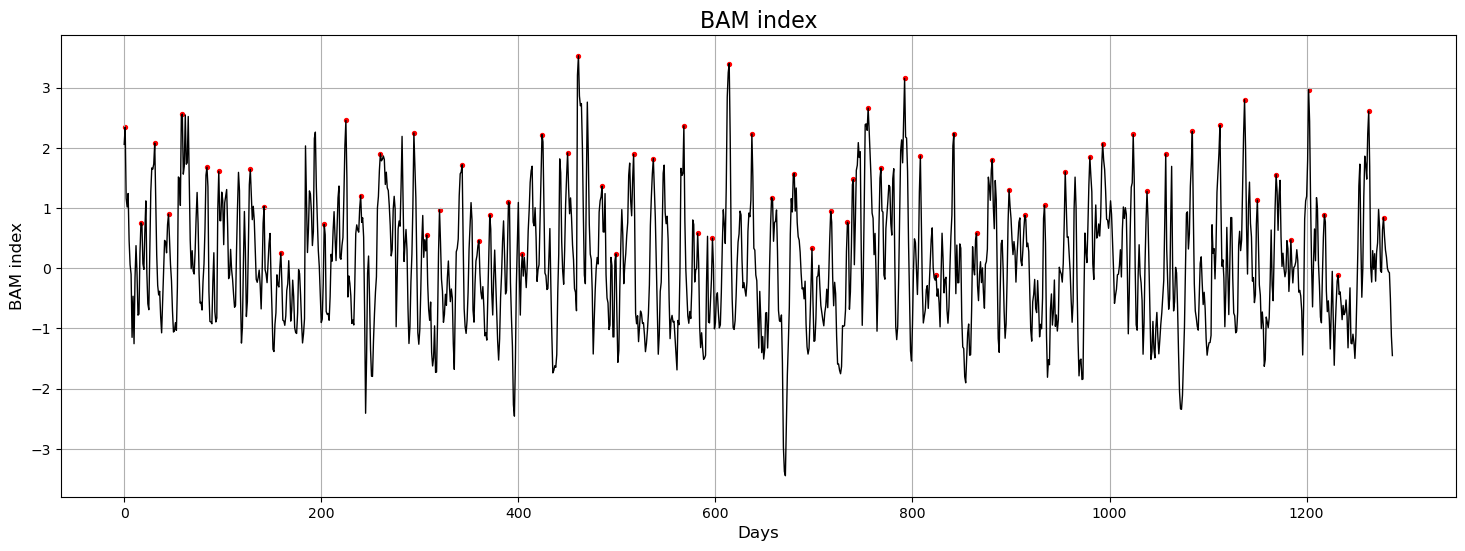

95 percentile is 2.909147628081814
80 percentile is 2.244008121368525
70 percentile is 1.9152670853589615
60 percentile is 1.8092293915659767
50 percentile is 1.5889187412689258
Minimum BAM index is -0.11969726753827381
8
7
13
0
18
10
13
17
14
10
8
9
1
2
0
13
0
1
12
11
0
[ 461  614  792 1202 1137  755 1263   59  225 1112  568    1 1084  294
  842  637 1024  424   31  993  450  260 1057  517  808  980  537  881
  343   84  768  128   96  955  680 1169  740  485  898 1038  240  657
 1150  390  934  142  320  717   45 1218  371  914 1278  734   17  203
  582  865  307  597 1184  360  698  159  499  404 1232  824]


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


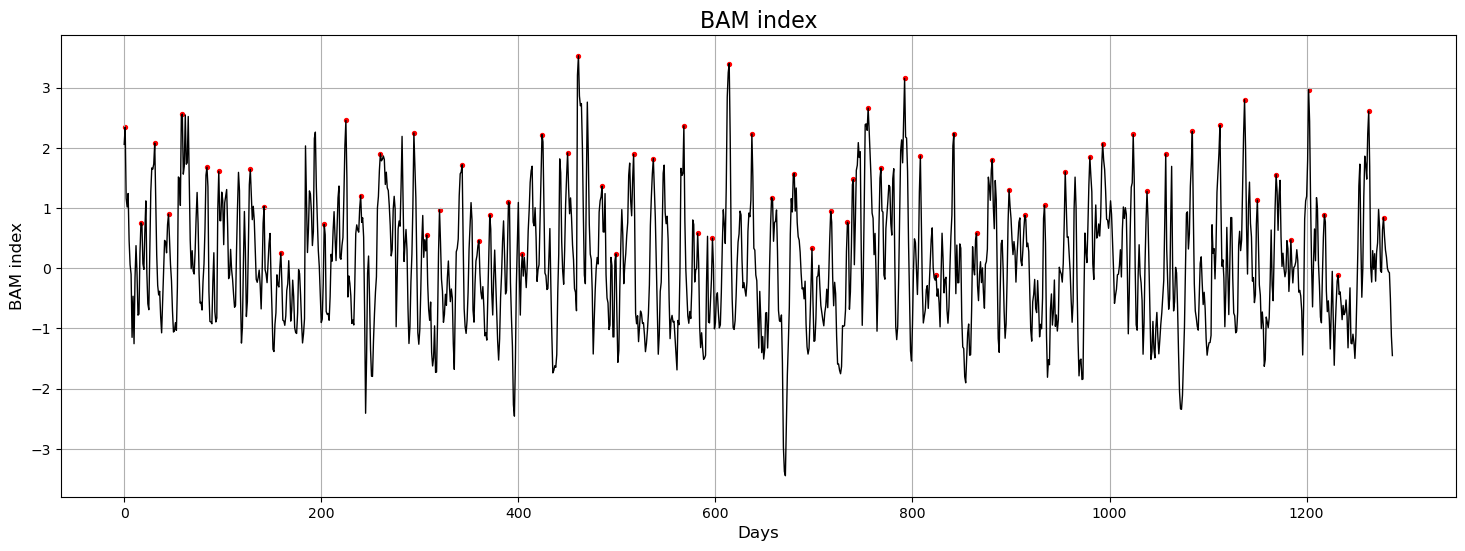

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


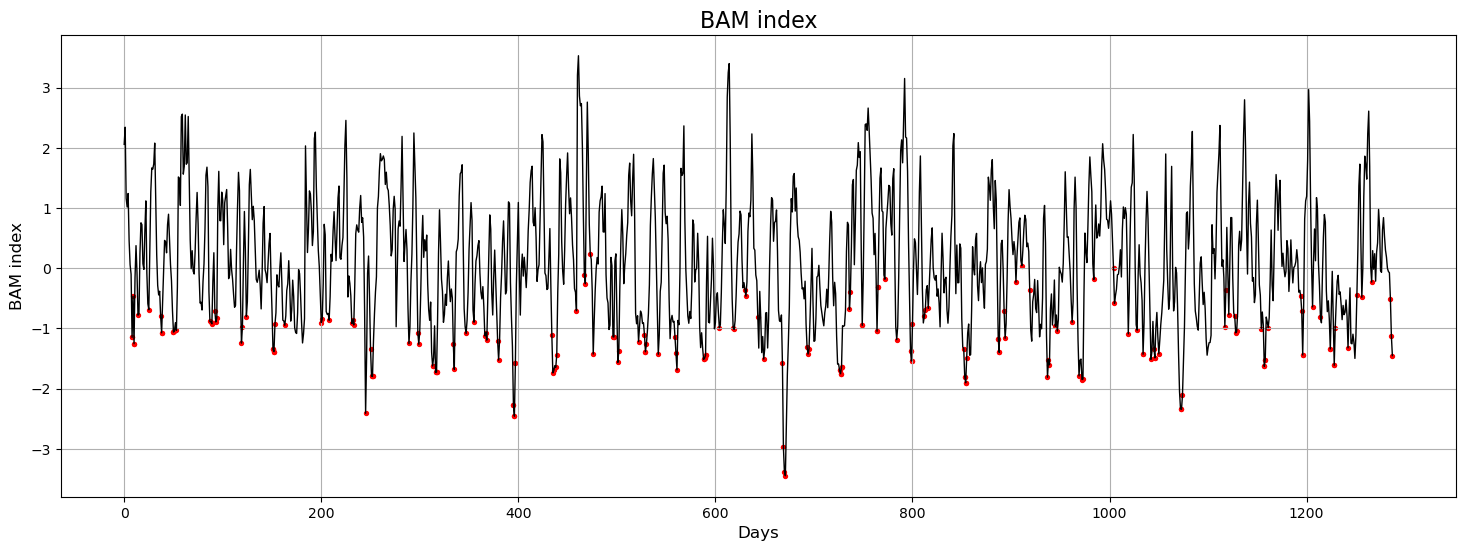

In [4]:
# ALL DAYS
with open('/scratch/negishi/zholder/NBAM_all.pkl','rb') as p:
    NBAMi = pickle.load(p)
with open('/scratch/negishi/zholder/NBAM_pac_all.pkl','rb') as p:
    NBAMi_pac = pickle.load(p)

# Create a list to hold the values for the years 2003 to 2010
filtered_values = []

# Loop through each key-value pair in the dictionary
for date_str, value in NBAMi.items():
    # Convert the string date to a datetime object
    date = datetime.strptime(str(date_str), '%Y-%m-%d')
    
    # Check if the year is between 2003 and 2010 (inclusive)
    if 2004 <= date.year <= 2017:
        if s_dict[s_list][0] <= date.month <= s_dict[s_list][-1]:
            filtered_values.append(value)
st_filtered_values = [((i - np.mean(filtered_values))/np.std(filtered_values)) for i in filtered_values] 

bam_array = []

# Loop through each key-value pair in the dictionary
for date_str, value in NBAMi.items():
    # Convert the string date to a datetime object
    date = datetime.strptime(str(date_str), '%Y-%m-%d')
    
    # Check if the year is between 2003 and 2010 (inclusive)
    if 2004 <= date.year <= 2017:
        if 1 <= date.month <= 12:
            bam_array.append(value)

#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import copy
import xarray as xr

# Time management
start_date = "2004-01-01"
end_date = "2017-12-31"
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates = dates[~((dates.month == 2) & (dates.day == 29))]  # Remove Feb 29
Month = dates.month

print(type(dates))
print(f"Total days: {len(dates)}") 
print(f"Feb 29 present: {any((dates.month == 2) & (dates.day == 29))}")  # False
print(f"First few dates: {dates[:5]}")

# Get JJA
jja_index = np.where(dates.month.isin(s_dict[s_list]))[0]
Date_JJA = dates[jja_index]

print('Total JJA days: '+str(len(Date_JJA))) 
print('Date_JJA[0:2]: '+str(Date_JJA[0:2]))

# BAM index
# BI = np.load('../../output/NBAM_index_synoptic_no_leap.npy') # 1940 to 2023
BI = np.array([i for i in bam_array])
BI_JJA = BI[jja_index]

print('BI shape: '+str(BI.shape))
print('BI JJA shape: '+str(BI_JJA.shape))

n_season = 14                        ### no. of season
# season_day= 92
season_day= sd_dict[s_list]                      ### no. of days in one season
season_all = n_season*season_day     ### no. of days in all seasons

BI_copy = copy.copy(BI)
BAM_event_all = []      # BAM peaks  
BAM_event_BI_all = []   # The value of the BI at that peaking date
number = 0
while 1:
    # index = np.squeeze(np.array(np.where( BI_copy==np.nanmax(BI_copy) )))[0]
    index = np.nanargmax(BI_copy)
#    index: An integer representing the position of the maximum value in BI_copy at each iteration.
    if BI[index]>=BI[index+1] and BI[index]>=BI[index-1] and BI[index]>=BI[index+2] and BI[index]>=BI[index-2]:   # 5 consecutive days        
        BAM_event_all.append(index)
        BAM_event_BI_all.append(BI[index])
        number+=1
        BI_copy[index-12:index+13] = np.nan
        if number > 999:     #  1000 peaks selected 
            break
    else:
        BI_copy[index]=np.nan
        
print('BAM_event_all shape: '+str(len(BAM_event_all)))

# extract BAM event in JJA
BAM_event_JJA = []
BAM_event_date_JJA = [] 
for i in range(len(BAM_event_all)):
    if Month[BAM_event_all[i]] in s_dict[s_list]:
        BAM_event_JJA.append(BAM_event_all[i])
        BAM_event_date_JJA.append(dates[BAM_event_all[i]])
        print(Month[BAM_event_all[i]])
        print(dates[BAM_event_all[i]])

# index in the Date_JJA time series ###
BAM_event = []
BAM_event_BI = []
for i in np.arange(len(BAM_event_JJA)):
    t = np.where(np.array(Date_JJA) == BAM_event_date_JJA[i])[0][0]
    BAM_event.append(t)
    BAM_event_BI.append(BI_JJA[t])   # .append(BAM_event_JJA[i])
    print('check '+ str(BI_JJA[t]) +', '+str(BAM_event_JJA[i]) )

print('BAM_event_JJA size: '+str(len(BAM_event_JJA)))
print('BAM_event size: '+str(len(BAM_event)))

# plot to check whether we get the correct BAM peaking date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA[:], '-k', linewidth=1)
plt.scatter(BAM_event, BI_JJA[BAM_event], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
#plt.xticks([0,29,59,89])
#ax.set_xticklabels([1,30,60,90])
ax.grid()
plt.show()

BAM_event = list(BAM_event)
BAM_event_BI = list(BAM_event_BI)

print('95 percentile is '+str(np.percentile(BAM_event_BI,95)))
print('80 percentile is '+str(np.percentile(BAM_event_BI,80)))
print('70 percentile is '+str(np.percentile(BAM_event_BI,70)))
print('60 percentile is '+str(np.percentile(BAM_event_BI,60)))
print('50 percentile is '+str(np.percentile(BAM_event_BI,50)))
print('Minimum BAM index is '+str(np.min(BAM_event_BI)))

# High and low BAM state
T=1
n_BAM = len(BAM_event_JJA)
HBAM = np.zeros((n_BAM,2*T+1))  # to store the date index of high BAM state
LBAM = np.zeros((n_BAM,2*T+1))  # to store the date index of low BAM state

for i in np.arange(n_BAM):
    #HBAM[i,:] = np.arange(BAM_event_JJA[i]-T,BAM_event_JJA[i]+T+1) # index in the entire duration
    HBAM[i,:] = np.arange(BAM_event[i]-T,BAM_event[i]+T+1)  # index in the JJA time series

for i in np.arange(n_BAM):
    index = BAM_event[i]
    if index%season_day-12<0:        
        BI_event = copy.copy(BI_JJA[index-(index%season_day):index+13])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event==np.nanmin(BI_event) ))[0])
            print(index1)
            LBAM[i,d] = index-(index%season_day)+index1
            BI_event[index1] = np.nan
    elif index%season_day+12>season_day:
        BI_event = copy.copy(BI_JJA[index-12: index+(season_day-(index%season_day))])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event==np.nanmin(BI_event) ))[0])
            LBAM[i,d] = index-12+index1
            BI_event[index1] = np.nan
    else:
        BI_event = copy.copy(BI_JJA[index-12:index+13])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event==np.nanmin(BI_event) ))[0])
            LBAM[i,d] = index-12+index1
            BI_event[index1] = np.nan

# np.savetxt('../../output/JJA/high_BAM_state_date_index_in_JJA.dat', HBAM, fmt='%f', delimiter=' ')
# np.savetxt('../../output/JJA/low_BAM_state_date_index_in_JJA.dat', LBAM, fmt='%f', delimiter=' ')

HI = HBAM[:,1].astype(int)
LI = LBAM.reshape(-1)
LI = LI.astype(int)
print(HI)
# plot to check whether we get the correct BAM peaking date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA[:], '-k', linewidth=1)
plt.scatter(HI, BI_JJA[HI], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
ax.grid()
plt.show()
N = 300
# plot to check whether we get the correct BAM minimum date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA[:], '-k', linewidth=1)
plt.scatter(LI, BI_JJA[LI], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
# plt.xlim(0,300)
#plt.xticks([0,29,59,89])
#ax.set_xticklabels([1,30,60,90])
ax.grid()
plt.show()

LI.sort()
HI.sort()



In [5]:
import numpy as np

# Assuming HI is a list or NumPy array of values
# Create a list of 17 empty lists, one for each season
HH = [[] for _ in range(14)]

# Define number of seasons and season length
season_length = sd_dict[s_list]   # or 92 if inclusive
n_seasons = 14

# Assign each value in HI to its correct season
for val in HI:
    season_index = int(val // season_length)
    if season_index >= n_seasons:
        season_index = n_seasons - 1  # Catch edge case where val == max
    HH[season_index].append(val)



import numpy as np

# Assuming HI is a list or NumPy array of values
# Create a list of 17 empty lists, one for each season
LL = [[] for _ in range(14)]

# Define number of seasons and season length
season_length = sd_dict[s_list]   # or 92 if inclusive
n_seasons = 14

# Assign each value in HI to its correct season
for val in LI:
    season_index = int(val // season_length)
    if season_index >= n_seasons:
        season_index = n_seasons - 1  # Catch edge case where val == max
    LL[season_index].append(val)


In [6]:
# Make sure HI is a NumPy array
HI = np.array(HI)
# Initialize list for new indices and values
HI_expanded = []
for h in HI:
    # Collect h-1, h, h+1 if within valid bounds
    for offset in [-1, 0]:
        idx = h + offset
        if 0 <= idx < len(date_list):
            HI_expanded.append(idx)         
# Convert to arrays if needed
HI_expanded = np.array(HI_expanded)


pos_BI_dates = [i for i in date_list[HI]]
neg_BI_dates = [pd.Timestamp(i) for i in np.unique(date_list[LI])]
pm1 = [i - np.timedelta64(1, 'D') for i in pos_BI_dates if i.month in s_dict[s_list]]
pp1 = [i + np.timedelta64(1, 'D') for i in pos_BI_dates if i.month in s_dict[s_list]]

excluded_dates = set(pos_BI_dates + neg_BI_dates)
other = [d for d in date_list if d.month in s_dict[s_list] and d not in excluded_dates]

all_pos = sorted(set(pm1 + pos_BI_dates))
print(f'{len(pos_BI_dates)} Peak days')
print(f'{len(neg_BI_dates)} Low State days')
print(f'{len(pm1)} Peak - 1')
print(f'{len(all_pos)} all_pos Days')
# print(f'{len(pp1)} Peak + 1')
# print(f'{len(other)} Other days')
# print(f'{len(date_list)} Total Days')

68 Peak days
164 Low State days
68 Peak - 1
136 all_pos Days


# EKE

In [7]:
p = '/depot/wanglei/data/ERA5_uvT/u_component_of_wind_1990_1dg.nc'
lll = xr.open_dataset(p)
lats_vt = lll.sel(lat = slice(0,90)).lat.values
lons_vt = lll.sel(lat = slice(0,90)).lon.values
EKEs = np.load('/scratch/negishi/zholder/EKE_unflitered_2000_2020.npy')
vt = np.load('/scratch/negishi/zholder/vt_850_2000_2020.npy')
vt.shape


# Time management
start_date = "2000-01-01"
end_date = "2020-12-31"
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates = dates[~((dates.month == 2) & (dates.day == 29))]  # Remove Feb 29
Month = dates.month

print(type(dates))
print(f"Total days: {len(dates)}") 
print(f"Feb 29 present: {any((dates.month == 2) & (dates.day == 29))}")  # False
print(f"First few dates: {dates[:5]}")

# Get JJA
# mam_index = np.where(dates.month.isin([3, 4, 5]))[0]
mam_index = np.where(
    dates.month.isin([3, 4, 5]) & dates.year.isin(np.arange(2004, 2018))
)[0]
Date_mam = dates[mam_index]

vt_mam = vt[mam_index]
eke_mam = EKEs[mam_index]
print('Total JJA days: '+str(len(Date_mam))) 
print('Date_JJA[0:2]: '+str(Date_mam[0:2]))


vt_neg = vt_mam[np.unique(LI)]
vt_pos = vt_mam[HI_expanded]

eke_neg = eke_mam[np.unique(LI)]
eke_pos = eke_mam[HI_expanded]

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Total days: 7665
Feb 29 present: False
First few dates: DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq=None)
Total JJA days: 1288
Date_JJA[0:2]: DatetimeIndex(['2004-03-01', '2004-03-02'], dtype='datetime64[ns]', freq=None)


# Load ETC

In [8]:
ds = xr.load_dataset('/scratch/negishi/zholder/ETC_TRACKS.nc')

In [23]:
def extract_valid_latlon(ds, date_subset, latmin, latmax, lonmin, lonmax):
    lat = ds['lat'].values.flatten()
    lon = ds['lon'].values.flatten()
    time = ds['time'].values.flatten().astype('datetime64[D]')
    date_subset = np.array(date_subset).astype('datetime64[D]')

    # Masks
    mask_date = np.isin(time, date_subset)
    mask_box = (lat >= latmin) & (lat <= latmax) & \
               (lon >= lonmin) & (lon <= lonmax)
    valid_mask = mask_date & mask_box

    return lon[valid_mask], lat[valid_mask]


latmin_b, latmax_b, lonmin_b, lonmax_b = lats.min(),lats.max(),lons.min(),lons.max()
# x, y = np.meshgrid(lons, lats)
lon_neg_BI, lat_neg_BI = extract_valid_latlon(ds, neg_BI_dates, latmin_b, latmax_b, lonmin_b, lonmax_b)
lon_all_pos, lat_all_pos = extract_valid_latlon(ds, all_pos, latmin_b, latmax_b, lonmin_b, lonmax_b)


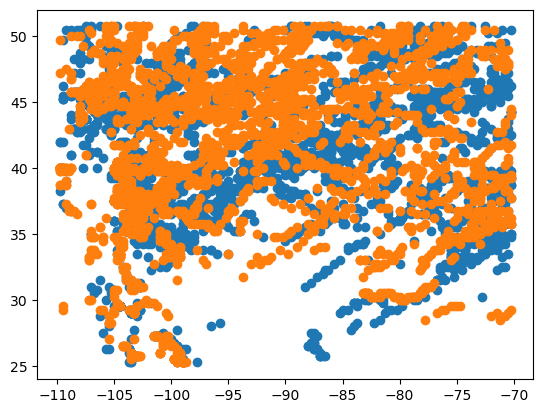

In [13]:
plt.scatter(lon_neg_BI, lat_neg_BI)
plt.scatter(lon_all_pos, lat_all_pos)

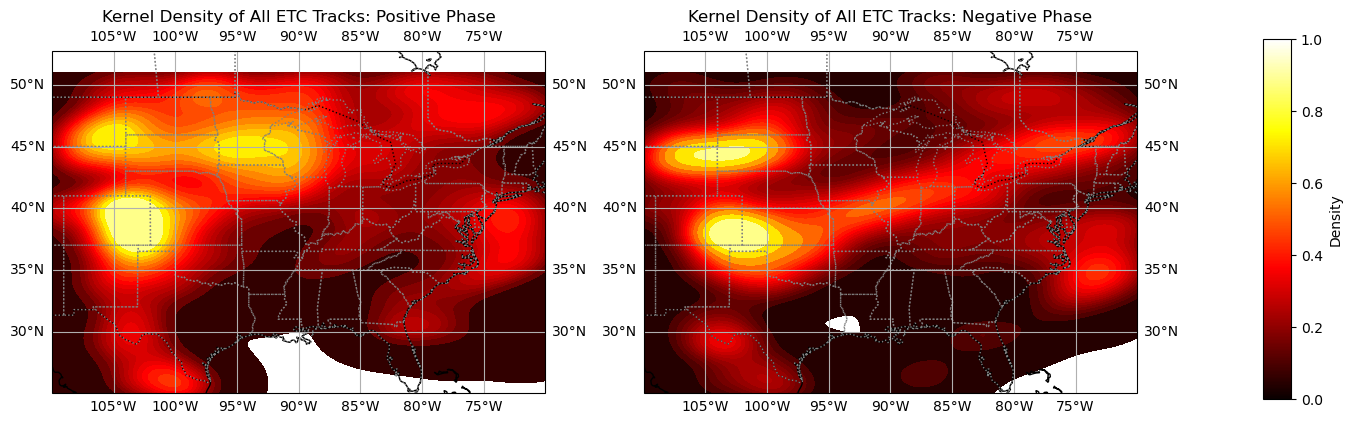

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6),
                        subplot_kw={'projection': ccrs.PlateCarree()})

subsets = [
    ("Positive Phase", lon_all_pos, lat_all_pos),
    ("Negative Phase", lon_neg_BI, lat_neg_BI)
    
]

for ax, (title, lon_pts, lat_pts) in zip(axs, subsets):
    ax.set_extent([lonmin_b, lonmax_b, latmin_b, latmax_b], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')
    ax.gridlines(draw_labels=True)

    # Plot KDE if we have points
    if len(lon_pts) > 0:
        sns.kdeplot(
            x=lon_pts, y=lat_pts,
            ax=ax,
            fill=True,
            cmap="hot",
            bw_adjust=0.7,
            levels=20,
            thresh=0.0001,
            clip=((lonmin_b, lonmax_b), (latmin_b, latmax_b)),
        )
    else:
        ax.set_title(f"{title}: No data in box")
        continue

    ax.set_title(f"Kernel Density of All ETC Tracks: {title}")
    ax.set_extent([lonmin_b, lonmax_b, latmin_b, latmax_b])
# plt.tight_layout()
cbar_ax = fig.add_axes([0.99, 0.2, 0.02, 0.6])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap="hot")
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label="Density")
plt.show()


In [45]:
def compute_pdf_per_day(ds, date_subset, latmin, latmax, lonmin, lonmax, bins=50):
    lat = ds['lat'].values
    lon = ds['lon'].values
    time = ds['time'].values

    # Flatten
    lat_flat = lat.flatten()
    lon_flat = lon.flatten()
    time_flat = time.flatten().astype('datetime64[D]')
    date_subset = np.array(date_subset).astype('datetime64[D]')

    # Create masks
    mask_date = np.isin(time_flat, date_subset)
    mask_latlon = (lat_flat >= latmin) & (lat_flat <= latmax) & \
                  (lon_flat >= lonmin) & (lon_flat <= lonmax)
    valid_mask = mask_date & mask_latlon

    lat_valid = lat_flat[valid_mask]
    lon_valid = lon_flat[valid_mask]

    if len(lat_valid) == 0:
        print("⚠️ No valid data points found.")
        return np.full((bins, bins), np.nan), None, None

    # Count number of unique days in date subset that exist in ds
    ds_dates = np.unique(time_flat[mask_date])
    n_days = len(ds_dates)
    print(f"📆 Normalizing over {n_days} days")

    # Build histogram and normalize per day
    hist, xedges, yedges = np.histogram2d(
        lat_valid, lon_valid,
        bins=bins,
        range=[[latmin, latmax], [lonmin, lonmax]],
        density=True  # Turn off density first
    )

    # hist = hist / n_days  # Normalize per day

    return hist.T, xedges, yedges  # Transpose for imshow

pdf_all_pos, x3, y3 = compute_pdf_per_day(ds, all_pos, latmin_b, latmax_b, lonmin_b, lonmax_b)
pdf_neg_BI, x1, y1 = compute_pdf_per_day(ds, neg_BI_dates, latmin_b, latmax_b, lonmin_b, lonmax_b)




📆 Normalizing over 135 days
📆 Normalizing over 163 days


📆 Normalizing over 135 days
📆 Normalizing over 163 days


/tmp/ipykernel_3585088/4070514700.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.97, 1])  # leave space for colorbar


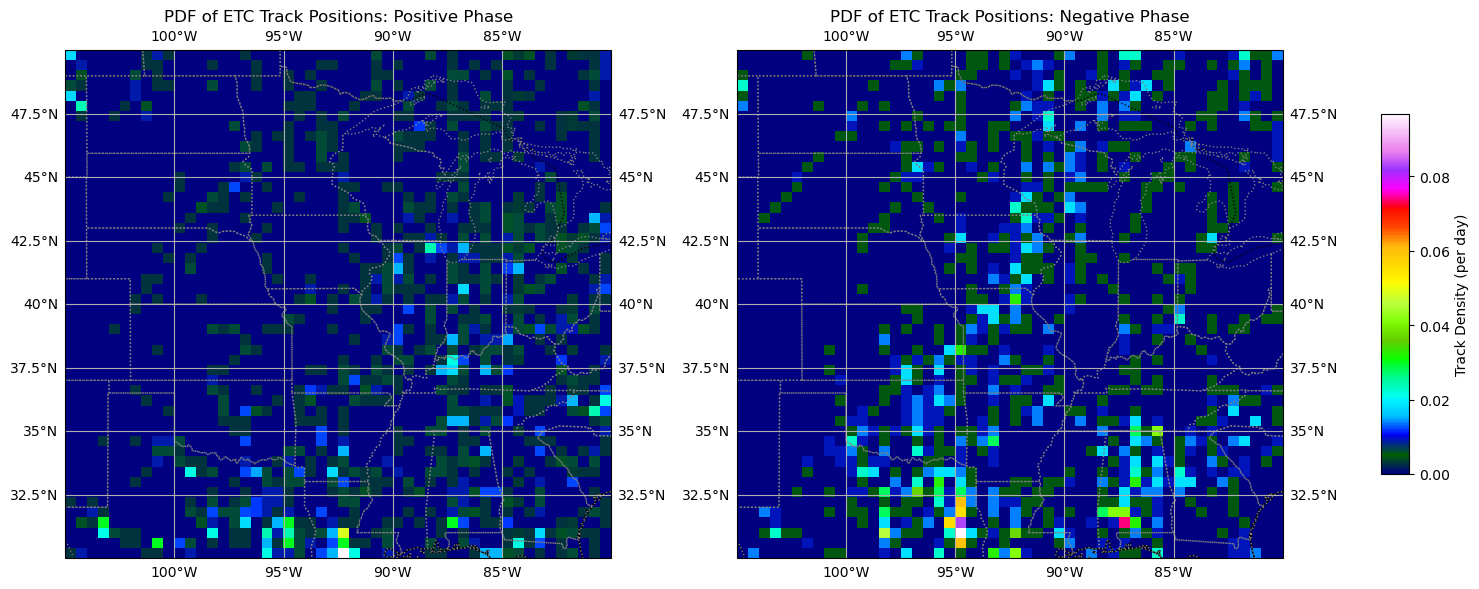

In [47]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Assuming your dataset is available as ds, and you have the relevant date subsets
# Also assume lonmin_b, lonmax_b, latmin_b, latmax_b are defined
latmin_b = 30
latmax_b = 50
lonmin_b = -105
lonmax_b = -80
fig, axs = plt.subplots(1, 2, figsize=(14, 6),
                        subplot_kw={'projection': ccrs.PlateCarree()})

subsets = [
    ("Positive Phase", all_pos),  # `pos_dates` is a list of dates for positive phase
    ("Negative Phase", neg_BI_dates),  # `neg_dates` is a list of dates for negative phase
]

histograms = []  # For potential colorbar scaling

for ax, (title, date_subset) in zip(axs, subsets):
    ax.set_extent([lonmin_b, lonmax_b, latmin_b, latmax_b], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')
    ax.gridlines(draw_labels=True)

    hist, lat_edges, lon_edges = compute_pdf_per_day(ds, date_subset, latmin_b, latmax_b, lonmin_b, lonmax_b,bins=50)

    if hist is None or np.all(np.isnan(hist)):
        ax.set_title(f"{title}: No data in box")
        continue

    # Show with imshow
    im = ax.imshow(hist,
                   origin='lower',
                   extent=[lon_edges[0], lon_edges[-1], lat_edges[0], lat_edges[-1]],
                   cmap=plt.cm.gist_ncar,
                   aspect='auto',
                   transform=ccrs.PlateCarree(),
                   )

    histograms.append(im)
    ax.set_title(f"PDF of ETC Track Positions: {title}")

# Add colorbar (shared for both subplots)
cbar_ax = fig.add_axes([0.99, 0.2, 0.02, 0.6])
cbar = fig.colorbar(histograms[0], cax=cbar_ax, label="Track Density (per day)")

plt.tight_layout(rect=[0, 0, 0.97, 1])  # leave space for colorbar
plt.show()


In [49]:
import numpy as np
import xarray as xr
import pandas as pd
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from itertools import chain
import copy
from numba import jit
import dask.array as da
import pickle
# %matplotlib inline
def get_unique_placements(track_num, lat, lon, ntimes):
    """
    Get unique pairs of lat/lon for a track
    """
    # Put all lat/lon pairs over each time for a track into an array
    this_row = np.array([[lat[track_num, tt], lon[track_num, tt]] for tt in range(0, ntimes)])
    # Return the unique pairs (axis=0)
    return np.array(np.unique(this_row, axis=0))


def count_unique_mcs(lat, lon, xbins, ybins):
    
    ntracks, ntimes = lat.shape

    # A function to loop over tracks
    get_unique = lambda D: get_unique_placements(D, lat, lon, ntimes)

    # Loop over each track and get the unique pairs of lat/lon
    all_uniques = list(map(get_unique, np.arange(0, ntracks)))

    # Flatten the list of lat/lon pairs (using chain), and convert into an array
    unique_latlon = np.array(list(chain(*all_uniques)))

    # Count number on map using histogram2d
    ranges = [[min(ybins), max(ybins)], [min(xbins), max(xbins)]]
    hist2d, yedges, xedges = np.histogram2d(unique_latlon[:,0], unique_latlon[:,1], bins=[ybins, xbins], range=ranges)

    return hist2d

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    """ Truncate colormap.
    """
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [50]:
base_time_obs = ds.time.load()
starttime_obs = base_time_obs.isel(time_step=0)
syear_obs = starttime_obs.dt.year.load()
season_obs = starttime_obs.dt.season.load()
# start_split_cloudnumber_obs = dsobs.start_split_cloudnumber.load()
# nyears_obs = len(np.unique(syear_obs))
# print(f'Number of unique years (OBS): {nyears_obs}')
ntracks_obs = ds.dims['track']
print(f'Number MCS (OBS): {ntracks_obs}')

Number MCS (OBS): 8882


/tmp/ipykernel_1152729/4238372131.py:8: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ntracks_obs = ds.dims['track']


In [63]:
# Format base_time_obs to extract the date part in 'YYYY-MM-DD' format
base_time_obs_date_str = base_time_obs.dt.strftime('%Y-%m-%d')

# Ensure pos_BI_dates is also a list of strings or datetime objects in the same format
all_pos = pd.to_datetime(all_pos).strftime('%Y-%m-%d')  # Convert to string

# Now filter the dataset by checking if base_time_obs_date_str is in pos_BI_dates
ds_pos = ds.where(base_time_obs_date_str.isin(all_pos), drop=True)


In [73]:
# Ensure pos_BI_dates is also a list of strings or datetime objects in the same format
neg_BI_dates = pd.to_datetime(neg_BI_dates).strftime('%Y-%m-%d')  # Convert to string

# Now filter the dataset by checking if base_time_obs_date_str is in pos_BI_dates
ds_neg = ds.where(base_time_obs_date_str.isin(neg_BI_dates), drop=True)

In [74]:
dd_pos = ds.sel(track = ds.track.isin(ds_pos.track.values))
dd_neg = ds.sel(track = ds.track.isin(ds_neg.track.values))

In [109]:
xbins = np.arange(lons[0], lons[-1], 1)
ybins = np.arange(lats[0], lats[-1], 1)
# rlat_obs_pos = dd_pos.lat.load().round()
# rlon_obs_pos = dd_pos.lon.load().round()

# rlat_obs_neg = dd_neg.lat.load().round()
# rlon_obs_neg = dd_neg.lon.load().round()


# rlat_obs_pos = etrack_pos.lat.load().round()
# rlon_obs_pos = etrack_pos.lon.load().round()

# rlat_obs_neg = etrack_neg.lat.load().round()
# rlon_obs_neg = etrack_neg.lon.load().round()

rlat_obs_pos = me_track_pos.lat.load().round()
rlon_obs_pos = me_track_pos.lon.load().round()

rlat_obs_neg = me_track_neg.lat.load().round()
rlon_obs_neg = me_track_neg.lon.load().round()

In [11]:
pos_mcs_etc_tracks = [5624, 7453, 7041, 6031, 6264, 6465, 5221, 6264, 5435, 6264, 6453,
       6875, 6033, 7660, 6033, 6651, 6033, 6465, 5860, 5221, 6875, 7689,
       5848, 6875, 6875, 6264, 6858, 5624, 6252, 6264, 6651, 5653, 7660,
       7631, 7660, 5221, 5221, 5614, 5051, 6670, 5230, 5860, 5051, 6866,
       5240, 6027, 6252, 5624, 7066, 5848, 5413]
neg_mcs_etc_tracks = [6659, 5243, 7433, 7431, 7243, 6864, 7455, 5852, 7656, 7433, 6256,
       6462, 5035, 6462, 6224, 5854, 7433, 6875, 6452, 5035, 5432, 6243,
       6256, 7479, 6242, 6242, 5629, 6875, 6249, 5855, 6243, 5243, 5852,
       5055, 7458, 6013, 6461, 5855, 6243, 7046, 7455, 6461, 5055, 7455,
       7053, 7430, 7458, 7071, 5864, 6462, 5852]

me_track_pos = ds.sel(track = ds.track.isin(pos_mcs_etc_tracks))
me_track_neg = ds.sel(track = ds.track.isin(neg_mcs_etc_tracks))

In [110]:
etc_ircount_pos = count_unique_mcs(rlat_obs_pos.values, rlon_obs_neg.values, xbins, ybins)
etc_ircount_neg = count_unique_mcs(rlat_obs_neg.values, rlon_obs_neg.values, xbins, ybins)

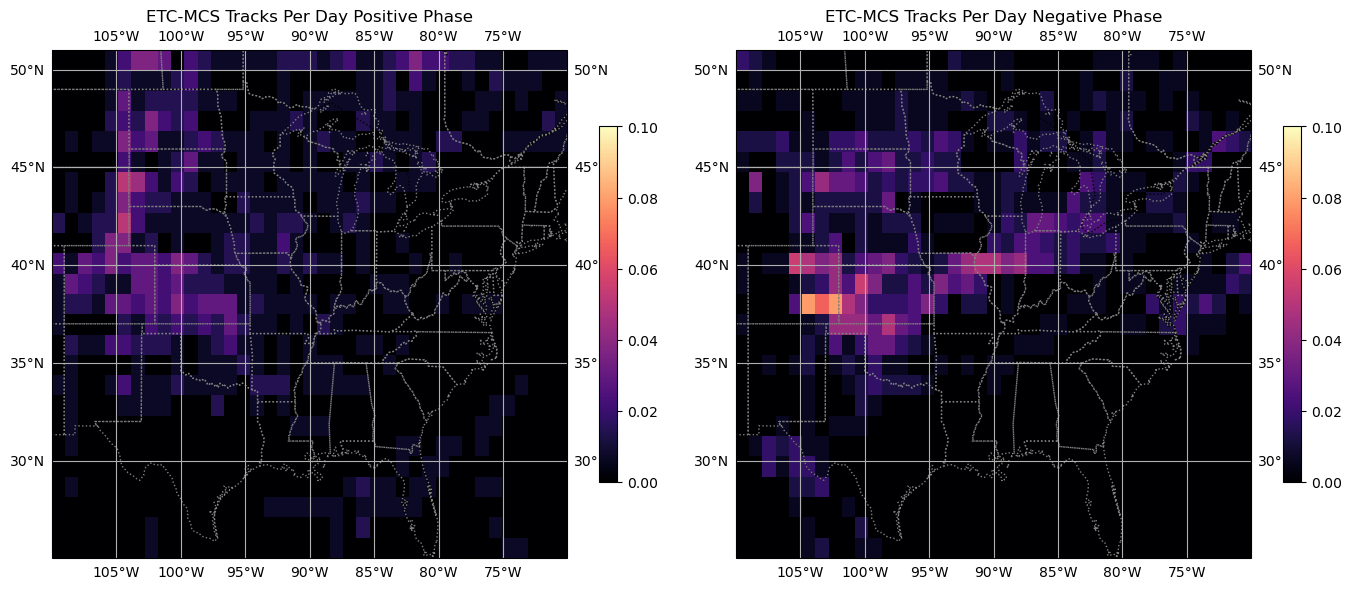

In [118]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create figure with 2 Cartopy GeoAxes
fig, axes = plt.subplots(1, 2, figsize=(14, 6),
                         subplot_kw={'projection': ccrs.PlateCarree()})

# Loop through both subplots
for ax in axes:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')
    ax.gridlines(draw_labels=True)

# Optional: Define extent if you know the region, e.g.:
# ax.set_extent([-130, -60, 20, 55])  # for US

# Plot positive histogram
im1 = axes[0].imshow(etc_ircount_pos/len(all_pos), origin='lower',
                     transform=ccrs.PlateCarree(), aspect='auto',
                     cmap='magma', extent=[lons[0], lons[-1], lats[0], lats[-1]],vmin=0,vmax=0.1)
axes[0].set_title("ETC-MCS Tracks Per Day Positive Phase")
fig.colorbar(im1, ax=axes[0], orientation='vertical', shrink=0.7)

# Plot negative histogram
im2 = axes[1].imshow(etc_ircount_neg/(len(neg_BI_dates)), origin='lower',
                     transform=ccrs.PlateCarree(), aspect='auto',
                     cmap='magma', extent=[lons[0], lons[-1], lats[0], lats[-1]],vmin=0,vmax=0.1)
axes[1].set_title("ETC-MCS Tracks Per Day Negative Phase")
fig.colorbar(im2, ax=axes[1], orientation='vertical', shrink=0.7)

plt.tight_layout()
plt.show()


# PRECIP

In [10]:
ll = xr.open_dataset('/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/JJAs/20040101.0000_20050101.0000/mcstrack_20040601_000000.nc')
lats = ll.lat.values
lons = ll.lon.values

load all precip

In [14]:
import numpy as np
import os

# Path to the directory containing the .npy files
data_dir = '/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/Daily_sum_MAM/'

# Initialize an empty list to store arrays
arrays_mcs = []
arrays_total = []
# Loop over the years 2004 to 2020 and load each .npy file
for year in range(2004, 2018):
    file_path_mcs = os.path.join(data_dir, f"{year}_MAM_MCSONLY.npy")
    arr_mcs = np.load(file_path_mcs)
    arrays_mcs.append(arr_mcs)

    file_path_total = os.path.join(data_dir, f"{year}_MAM.npy")
    arr_total = np.load(file_path_total)
    arrays_total.append(arr_total)

# Stack (concatenate) the arrays along the first axis (day axis)
mcs_array = np.concatenate(arrays_mcs, axis=0)
total_array = np.concatenate(arrays_total, axis=0)
# Optionally, save the concatenated array to a new file
# np.save(os.path.join(data_dir, '2004_2020_JJA_concatenated.npy'), concatenated_array)

print(f"Shape of concatenated mcs array: {mcs_array.shape}")
print(f"Shape of concatenated total array: {total_array.shape}")

Shape of concatenated mcs array: (1288, 715, 1100)
Shape of concatenated total array: (1288, 715, 1100)


load etc-mcs precip

In [15]:
import numpy as np
import os

# Path to the directory containing the .npy files
data_dir = '/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/Daily_sum_ETC/'

# Initialize an empty list to store arrays
arrays_mcs = []
arrays_total = []
# Loop over the years 2004 to 2020 and load each .npy file
for year in range(2004, 2018):
    file_path_mcs = os.path.join(data_dir, f"{year}_ETC_MCSONLY.npy")
    arr_mcs = np.load(file_path_mcs)
    arrays_mcs.append(arr_mcs)

    # file_path_total = os.path.join(data_dir, f"{year}_MAM.npy")
    # arr_total = np.load(file_path_total)
    # arrays_total.append(arr_total)

# Stack (concatenate) the arrays along the first axis (day axis)
etc_array = np.concatenate(arrays_mcs, axis=0)
# total_array = np.concatenate(arrays_total, axis=0)
# Optionally, save the concatenated array to a new file
# np.save(os.path.join(data_dir, '2004_2020_JJA_concatenated.npy'), concatenated_array)

print(f"Shape of concatenated mcs array: {etc_array.shape}")
# print(f"Shape of concatenated total array: {total_array.shape}")

Shape of concatenated mcs array: (1288, 715, 1100)


In [16]:
pos_rain_mcs = mcs_array[HI_expanded] 
neg_rain_mcs = mcs_array[np.unique(LI)] 

pos_rain_total = total_array[HI_expanded] 
neg_rain_total = total_array[np.unique(LI)]

threshold = np.percentile(total_array, 99, axis=0)
threshold_mcs = np.percentile(mcs_array, 99, axis=0)

# Create boolean masks of extreme events

extreme_pos = pos_rain_total > threshold  # shape: (days_pos, lat, lon)
extreme_neg = neg_rain_total > threshold  # shape: (days_neg, lat, lon)

extreme_pos_mcs = pos_rain_mcs > threshold  # shape: (days_pos, lat, lon)
extreme_neg_mcs = neg_rain_mcs > threshold  # shape: (days_neg, lat, lon)


# Count the number of extreme days at each grid point

extreme_count_pos = np.sum(extreme_pos, axis=0)  # shape: (lat, lon)
extreme_count_neg = np.sum(extreme_neg, axis=0)  # shape: (lat, lon)


extreme_count_pos_mcs = np.sum(extreme_pos_mcs, axis=0)  # shape: (lat, lon)
extreme_count_neg_mcs = np.sum(extreme_neg_mcs, axis=0)  # shape: (lat, lon)

# extreme_count_pos and extreme_count_neg are already computed from previous steps
# These are counts of extreme (95th percentile) days per grid point

# Normalize by number of days in each subset

n_pos = len(HI_expanded)
n_neg = len(np.unique(LI))


# Compute frequency (i.e., proportion of extreme days)

freq_extreme_pos = (extreme_count_pos / n_pos) * 100 # shape: (lat, lon)
freq_extreme_neg = (extreme_count_neg / n_neg) * 100 # shape: (lat, lon)

freq_extreme_pos_mcs = (extreme_count_pos_mcs / n_pos) * 100 # shape: (lat, lon)
freq_extreme_neg_mcs = (extreme_count_neg_mcs / n_neg) * 100 # shape: (lat, lon)

# Now compare the frequencies
freq_diff = freq_extreme_pos - freq_extreme_neg  # shape: (lat, lon)
freq_diff_mcs = freq_extreme_pos_mcs - freq_extreme_neg_mcs  # shape: (lat, lon)

##########

pos_rain_etc = etc_array[HI_expanded] 
neg_rain_etc = etc_array[np.unique(LI)] 

pos_etc_con = (np.sum(pos_rain_etc,axis=0) / np.sum(pos_rain_mcs,axis=0)) * 100
neg_etc_con = (np.sum(neg_rain_etc,axis=0) / np.sum(neg_rain_mcs,axis=0)) * 100

# Create boolean masks of extreme events

extreme_pos_etc = pos_rain_etc > threshold  # shape: (days_pos, lat, lon)
extreme_neg_etc = neg_rain_etc > threshold  # shape: (days_neg, lat, lon)


# Count the number of extreme days at each grid point

extreme_count_pos_etc = np.sum(extreme_pos_etc, axis=0)  # shape: (lat, lon)
extreme_count_neg_etc = np.sum(extreme_neg_etc, axis=0)  # shape: (lat, lon)


# extreme_count_pos and extreme_count_neg are already computed from previous steps
# These are counts of extreme (95th percentile) days per grid point
# Normalize by number of days in each subset

n_pos = len(HI_expanded)
n_neg = len(np.unique(LI))

# Compute frequency (i.e., proportion of extreme days)

freq_extreme_pos_etc = (extreme_count_pos_etc / n_pos) * 100 # shape: (lat, lon)
freq_extreme_neg_etc = (extreme_count_neg_etc / n_neg) * 100 # shape: (lat, lon)

# Now compare the frequencies
freq_diff = freq_extreme_pos - freq_extreme_neg  # shape: (lat, lon)
freq_diff_mcs = freq_extreme_pos_mcs - freq_extreme_neg_mcs  # shape: (lat, lon)



/tmp/ipykernel_1208430/2739281620.py:54: RuntimeWarning: invalid value encountered in divide
  pos_etc_con = (np.sum(pos_rain_etc,axis=0) / np.sum(pos_rain_mcs,axis=0)) * 100
/tmp/ipykernel_1208430/2739281620.py:55: RuntimeWarning: invalid value encountered in divide
  neg_etc_con = (np.sum(neg_rain_etc,axis=0) / np.sum(neg_rain_mcs,axis=0)) * 100


In [17]:

# Step 1: Compute 99th percentile at each grid point
p99 = np.percentile(total_array, 99, axis=0)  # shape: (lat, lon)

# Step 2: Create a mask where total >= 99th percentile (broadcast across time)
mask_99_pos = pos_rain_mcs >= p99  # shape: (days, lat, lon)
mask_99_neg = neg_rain_mcs >= p99


# Step 3: Apply the mask
etc_99_pos = np.where(mask_99_pos, pos_rain_etc, 0)
total_99_pos = np.where(mask_99_pos, pos_rain_mcs, 0)

etc_99_neg = np.where(mask_99_neg, neg_rain_etc, 0)
total_99_neg = np.where(mask_99_neg, neg_rain_mcs, 0)

# Step 4: Sum over time and compute percent contribution
with np.errstate(divide='ignore', invalid='ignore'):
    ee_con_pos = (np.sum(etc_99_pos, axis=0) / np.sum(total_99_pos, axis=0)) * 100
    ee_con_pos = np.nan_to_num(ee_con_pos)  # Replace NaNs from 0/0 with 0

    ee_con_neg = (np.sum(etc_99_neg, axis=0) / np.sum(total_99_neg, axis=0)) * 100
    ee_con_neg = np.nan_to_num(ee_con_neg)  # Replace NaNs from 0/0 with 0


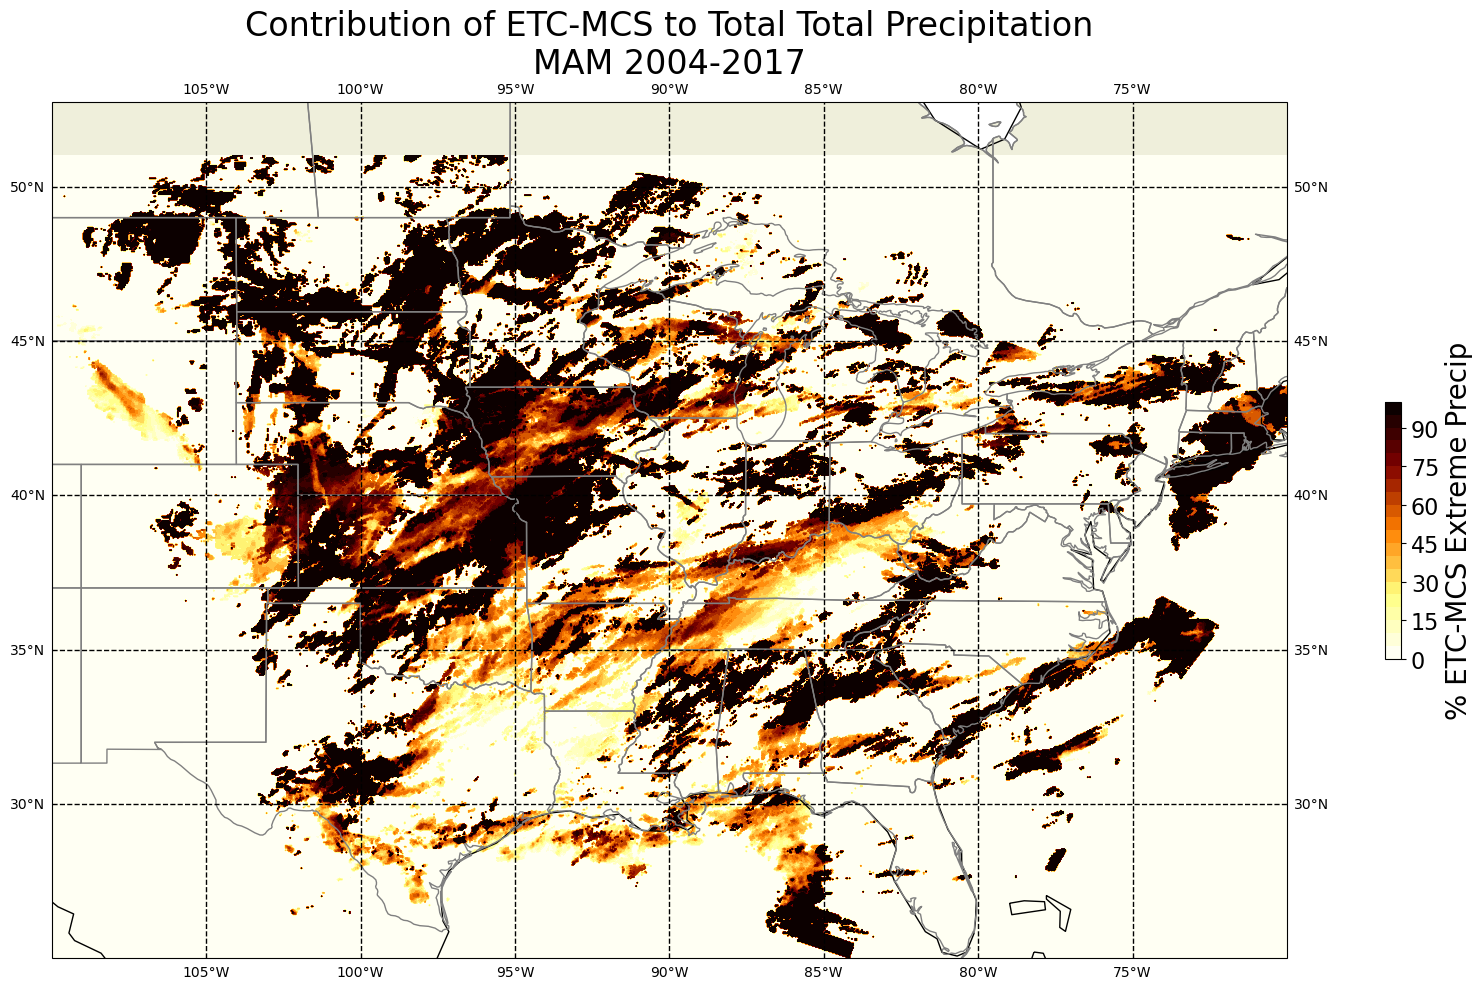

In [18]:

x, y = np.float32(np.meshgrid(lons, lats))

# Set up the figure and subplots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the contour levels for both positive and negative rain
clevs = np.arange(0, 105, 5)

# Set the extent for both axes (same for both)
for ax in [ax1]:
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlines = True

# Plot the first subplot (positive rainfall)
mesh1 = ax1.contourf(x, y, ee_con_pos, levels=clevs, cmap='afmhot_r')
# plt.cm.rainbow
# con = ax1.contour(x,y,all_std)
cb1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", pad=0.05, aspect=16, shrink=0.3)
cb1.set_label(f'% ETC-MCS Extreme Precip', size=20)
cb1.ax.tick_params(labelsize=16)
ax1.set_title(f'Contribution of ETC-MCS to Total Total Precipitation\nMAM 2004-2017', size=24)




# Show the plot
plt.tight_layout()
plt.show()


RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

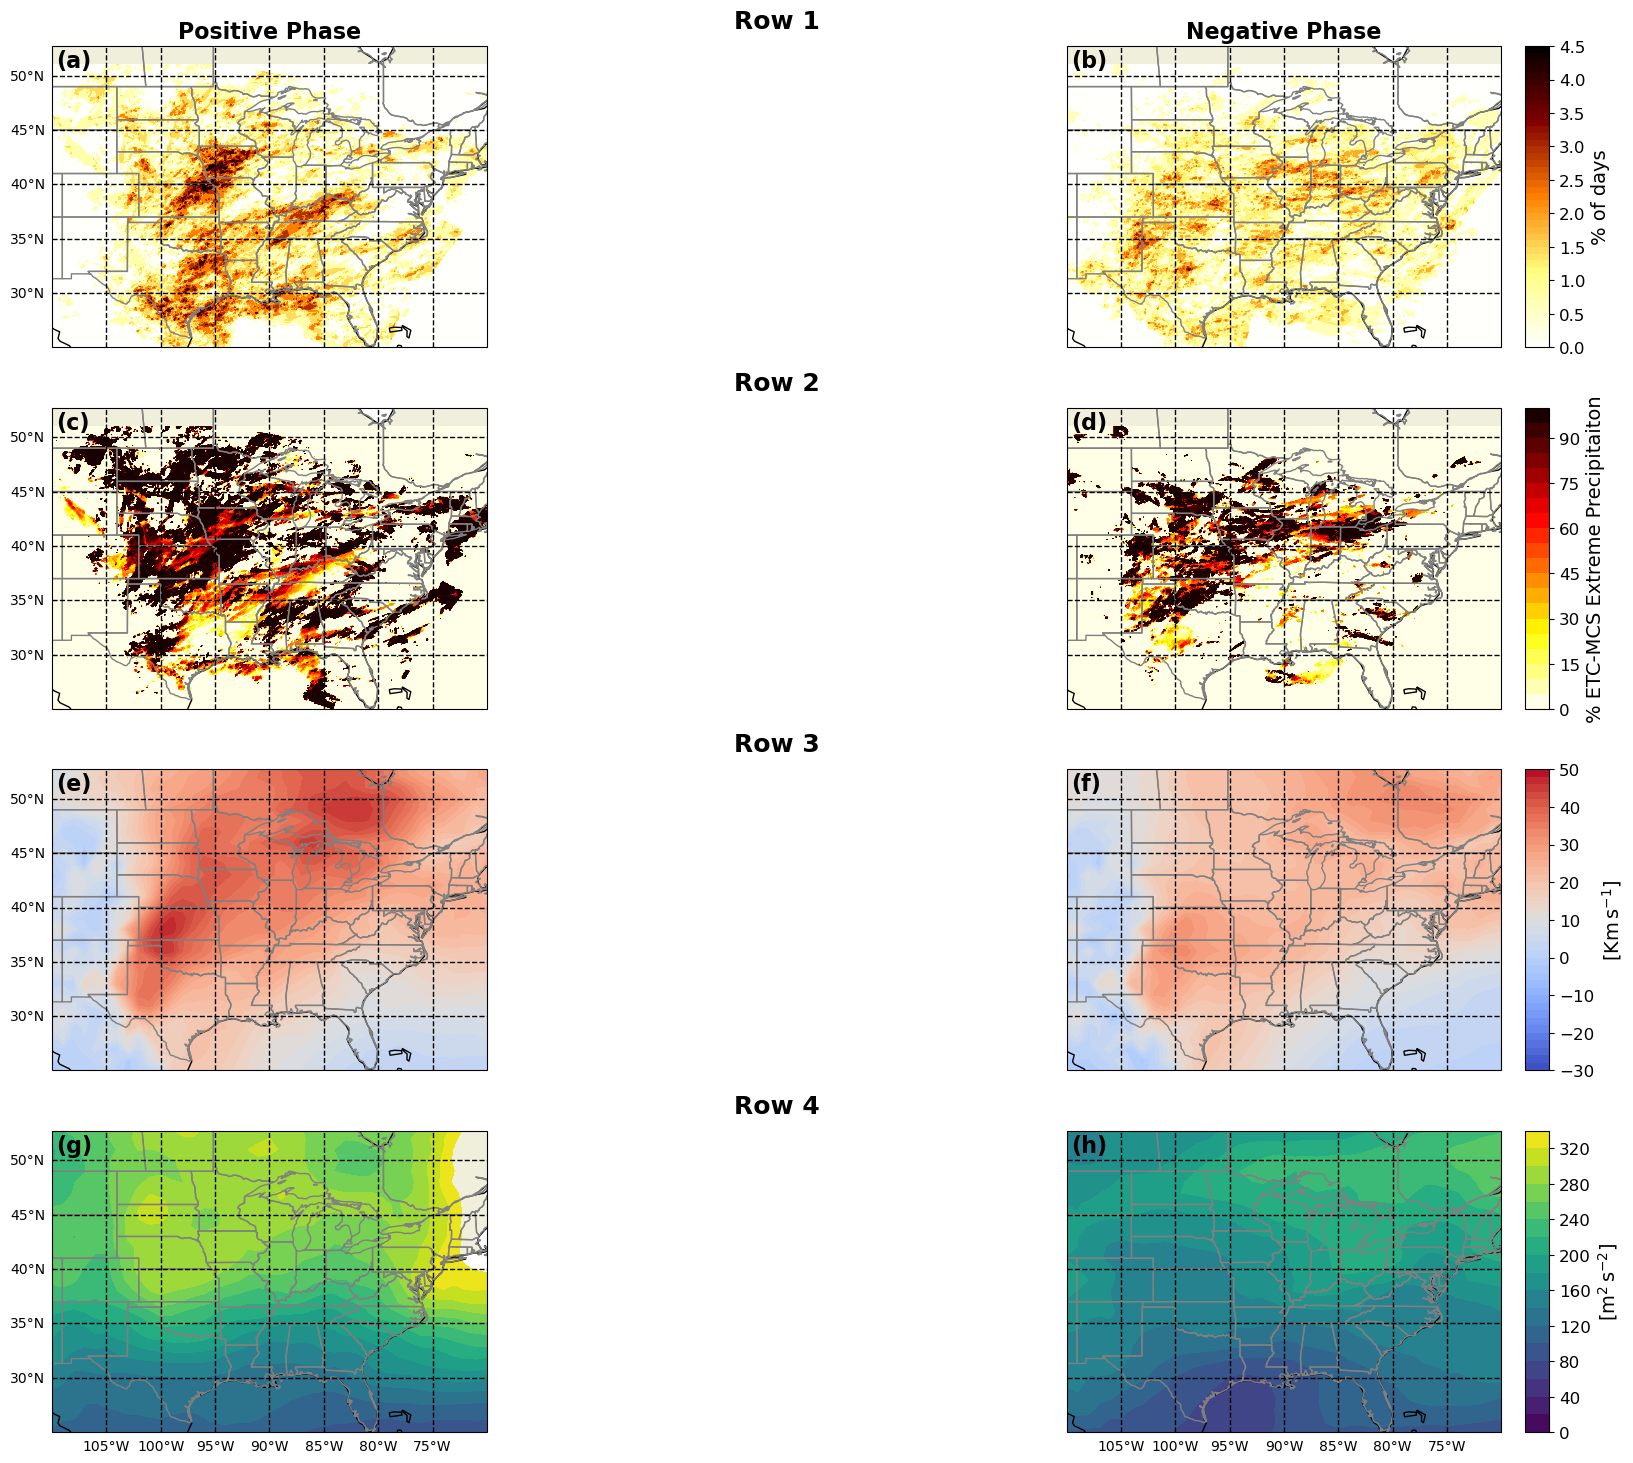

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create mesh grids
x, y = np.meshgrid(lons, lats)
x_v, y_v = np.meshgrid(lons_vt, lats_vt)

# Set up 4x2 subplot figure
fig, axs = plt.subplots(4, 2, figsize=(24, 18), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)
axs = axs.flatten()

# Contour levels
clevs_std_pos = np.arange(0, 4.6, 0.1)
# clevs_pos_etc_con = np.arange(0, 12.2, 0.2)
clevs_pos_etc_con = np.arange(0, 105, 5)
clevs_vt = np.arange(-30, 52, 2)
clevs_eke = np.arange(0, 360, 20)

# Plot data (data array, key)
data = [
    (freq_extreme_pos_mcs, 'pos'),
    (freq_extreme_neg_mcs, 'neg'),
    # (freq_extreme_pos_etc, 'pos_etc'),
    # (freq_extreme_neg_etc, 'neg_etc'),
    (ee_con_pos, 'pos_etc'),
    (ee_con_neg, 'neg_etc'),
    (np.nanmean(vt_pos, axis=0), 'vt_pos'),
    (np.nanmean(vt_neg, axis=0), 'vt_neg'),
    (np.nanmean(eke_pos, axis=0), 'eke_pos'),
    (np.nanmean(eke_neg, axis=0), 'eke_neg')
]

# Labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
row_titles = ['Row 1', 'Row 2', 'Row 3', 'Row 4','Row 5']
phase_titles = ['Positive Phase', 'Negative Phase']

# Colorbar handles per row
row_meshes = [None] * 4

# === Plot each subplot ===
for i, (freq, key) in enumerate(data):
    ax = axs[i]
    row_idx, col_idx = divmod(i, 2)

    # Map setup
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    # Gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = (row_idx == 3)
    gl.left_labels = (col_idx == 0)

    # Choose contour and colormap
    if key in ['pos_etc', 'neg_etc']:
        clevs = clevs_pos_etc_con
        mesh = ax.contourf(x, y, freq, levels=clevs, cmap='hot_r')
    elif key in ['pos', 'neg']:
        clevs = clevs_std_pos
        mesh = ax.contourf(x, y, freq, levels=clevs, cmap='afmhot_r')
    elif key in ['vt_pos', 'vt_neg']:
        clevs = clevs_vt
        mesh = ax.contourf(x_v, y_v, freq, levels=clevs, cmap='coolwarm')
    elif key in ['eke_pos', 'eke_neg']:
        clevs = clevs_eke
        mesh = ax.contourf(x_v, y_v, freq, levels=clevs, cmap='viridis')

    row_meshes[row_idx] = mesh

    # Subplot label
    ax.text(0.01, 0.99, subplot_labels[i], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left')

    # Column titles (only on top row)
    if row_idx == 0:
        ax.set_title(phase_titles[col_idx], fontsize=16, fontweight='bold')

# === Row titles centered above each row ===
for row in range(4):
    left_ax = axs[row * 2]
    right_ax = axs[row * 2 + 1]
    x0 = (left_ax.get_position().x0 + right_ax.get_position().x1) / 2
    y1 = left_ax.get_position().y1 + 0.01
    fig.text(x0, y1, row_titles[row], ha='center', fontsize=18, fontweight='bold')
row_keys = ['pos','pos_etc','vt_pos','eke_pos']  # to store keys for each row

# === Add colorbars aligned with each row ===
for row in range(4):
    left_ax = axs[row * 2]
    right_ax = axs[row * 2 + 1]
    cax_x = right_ax.get_position().x1 + 0.01
    cax_y = left_ax.get_position().y0
    cax_h = left_ax.get_position().y1 - cax_y
    cax = fig.add_axes([cax_x, cax_y, 0.01, cax_h])
    cb = fig.colorbar(row_meshes[row], cax=cax,extend='max')

    # Use the saved key for this row
    key = row_keys[row]

    if key in ['vt_pos', 'vt_neg']:
        cb.set_label(r'[$\mathrm{Km\,s^{-1}}$]', fontsize=14)
    elif key in ['eke_pos', 'eke_neg']:
        cb.set_label(r'[$\mathrm{m^{2}\,s^{-2}}$]', fontsize=14)
    elif key in ['pos_etc', 'neg_etc']:
        cb.set_label(f'% ETC-MCS Extreme Precipitaiton',fontsize=14)
    elif key in ['pos','neg']:
        cb.set_label('% of days', fontsize=14)

    cb.ax.tick_params(labelsize=12)


plt.tight_layout()
plt.show()


RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

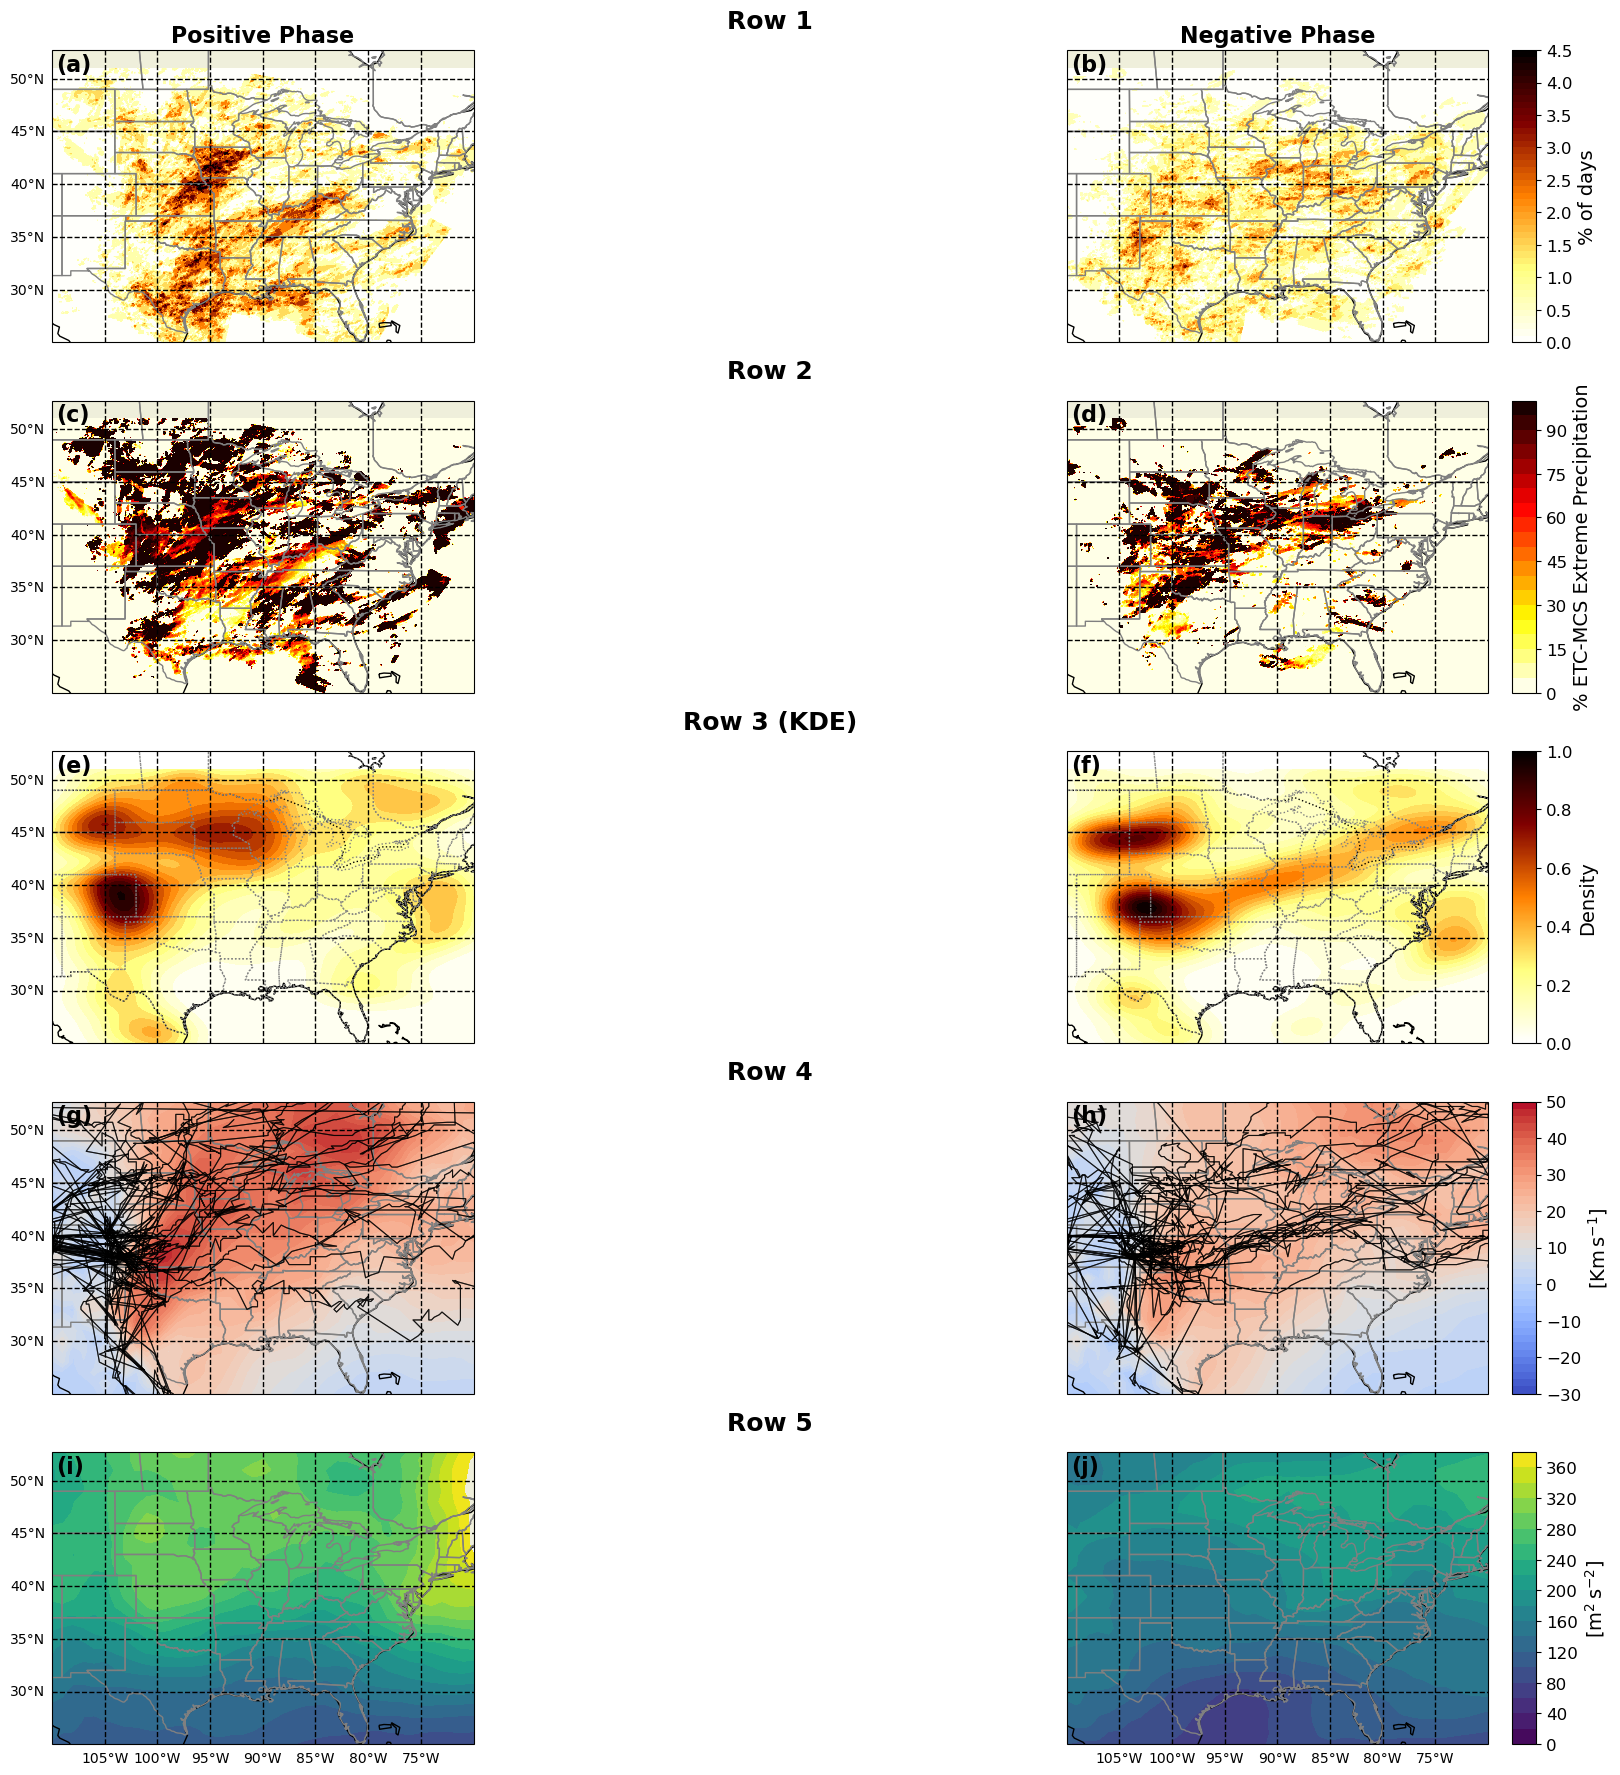

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from matplotlib.colors import Normalize

# === Define meshgrids ===
x, y = np.meshgrid(lons, lats)
x_v, y_v = np.meshgrid(lons_vt, lats_vt)

# === Set up figure and subplots ===
fig, axs = plt.subplots(5, 2, figsize=(24, 22), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)
axs = axs.flatten()

# === Contour levels ===
clevs_std_pos = np.arange(0, 4.6, 0.1)
clevs_pos_etc_con = np.arange(0, 105, 5)
clevs_vt = np.arange(-30, 52, 2)
clevs_eke = np.arange(0, 400, 20)

# === Subplot index to data mapping ===
data_plot_map = {
    0: (freq_extreme_pos_mcs, 'pos'),
    1: (freq_extreme_neg_mcs, 'neg'),
    2: (ee_con_pos, 'pos_etc'),
    3: (ee_con_neg, 'neg_etc'),
    6: (np.nanmean(vt_pos, axis=0), 'vt_pos'),
    7: (np.nanmean(vt_neg, axis=0), 'vt_neg'),
    8: (np.nanmean(eke_pos, axis=0), 'eke_pos'),
    9: (np.nanmean(eke_neg, axis=0), 'eke_neg')
}

subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']
row_titles = ['Row 1', 'Row 2', 'Row 3 (KDE)', 'Row 4', 'Row 5']
phase_titles = ['Positive Phase', 'Negative Phase']
row_keys = ['pos', 'pos_etc', 'kde', 'vt_pos', 'eke_pos']

# === Track colorbar handles per row ===
row_meshes = [None] * 5

# === Plot all non-KDE data ===
for idx, (data_array, key) in data_plot_map.items():
    ax = axs[idx]
    row_idx, col_idx = divmod(idx, 2)

    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = (row_idx == 4)
    gl.left_labels = (col_idx == 0)

    # Choose colormap and levels
    if key in ['pos_etc', 'neg_etc']:
        clevs = clevs_pos_etc_con
        mesh = ax.contourf(x, y, data_array, levels=clevs, cmap='hot_r')
    elif key in ['pos', 'neg']:
        clevs = clevs_std_pos
        mesh = ax.contourf(x, y, data_array, levels=clevs, cmap='afmhot_r')
    elif key in ['vt_pos', 'vt_neg']:
        clevs = clevs_vt
        mesh = ax.contourf(x_v, y_v, data_array, levels=clevs, cmap='coolwarm')
        # === Function to plot all track lines for a given subset ===
        def plot_all_track_lines(ds_subset, ax, color='black', linewidth=0.8, alpha=0.7):
            """Plot all lat/lon tracks from an xarray.Dataset subset onto a Cartopy axis."""
            for i in range(ds_subset.track.size):
                lat = ds_subset.lat.isel(track=i).values
                lon = ds_subset.lon.isel(track=i).values

                # Mask NaNs
                valid = ~np.isnan(lat) & ~np.isnan(lon)
                if np.sum(valid) > 1:  # Only plot lines with more than 1 point
                    ax.plot(lon[valid], lat[valid], transform=ccrs.PlateCarree(),
                            color=color, linewidth=linewidth, alpha=alpha)

# === Plot track overlays on Row 4 subplots (axs[6] and axs[7]) ===
# Row 4 corresponds to: vt_pos → axs[6], vt_neg → axs[7]

        plot_all_track_lines(me_track_pos, axs[6], color='black', linewidth=0.8, alpha=0.7)
        plot_all_track_lines(me_track_neg, axs[7], color='black', linewidth=0.8, alpha=0.7)

    elif key in ['eke_pos', 'eke_neg']:
        clevs = clevs_eke
        mesh = ax.contourf(x_v, y_v, data_array, levels=clevs, cmap='viridis')
    else:
        mesh = None

    row_meshes[row_idx] = mesh

    ax.text(0.01, 0.99, subplot_labels[idx], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left')

    if row_idx == 0:
        ax.set_title(phase_titles[col_idx], fontsize=16, fontweight='bold')

from scipy.stats import gaussian_kde

# === KDE Row (Row 3): axs[4], axs[5] ===
kde_subsets = [
    ("Positive Phase", lon_all_pos, lat_all_pos),
    ("Negative Phase", lon_neg_BI, lat_neg_BI)
]

for j, (title, lon_pts, lat_pts) in enumerate(kde_subsets):
    idx = 4 + j  # axs[4] and axs[5]
    ax = axs[idx]
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    # ax.set_extent([lonmin_b, lonmax_b, latmin_b, latmax_b], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')

    gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = (2 == 4)  # False
    gl.left_labels = (j == 0)

    if len(lon_pts) > 0 and len(lat_pts) > 0:
        # KDE estimation
        xy = np.vstack([lon_pts, lat_pts])
        kde = gaussian_kde(xy, bw_method=0.2)

        # Grid definition
        lon_grid = np.linspace(lons[0], lons[-1], 100)
        lat_grid = np.linspace(lats[0], lats[-1], 100)
        lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)
        coords = np.vstack([lon_mesh.ravel(), lat_mesh.ravel()])
        density = kde(coords).reshape(lon_mesh.shape)

        # Plot KDE as contourf
        mesh = ax.contourf(
            lon_mesh, lat_mesh, density,
            levels=20, cmap="afmhot_r", transform=ccrs.PlateCarree()
        )

        row_meshes[2] = mesh  # Save for colorbar
    #     ax.set_title(f"KDE of ETC Tracks: {title}", fontsize=14)
    # else:
    #     ax.set_title(f"{title}: No data in box", fontsize=14)

    ax.text(0.01, 0.99, subplot_labels[idx], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left')


# === Row Titles ===
for row in range(5):
    left_ax = axs[row * 2]
    right_ax = axs[row * 2 + 1]
    x0 = (left_ax.get_position().x0 + right_ax.get_position().x1) / 2
    y1 = left_ax.get_position().y1 + 0.01
    fig.text(x0, y1, row_titles[row], ha='center', fontsize=18, fontweight='bold')

# === Colorbars per row ===
for row in range(5):
    left_ax = axs[row * 2]
    right_ax = axs[row * 2 + 1]
    cax_x = right_ax.get_position().x1 + 0.01
    cax_y = left_ax.get_position().y0
    cax_h = left_ax.get_position().y1 - cax_y
    cax = fig.add_axes([cax_x, cax_y, 0.01, cax_h])

    key = row_keys[row]

    if key == 'kde':
        sm = plt.cm.ScalarMappable(cmap="afmhot_r", norm=Normalize())
        sm.set_array([])
        cb = fig.colorbar(sm, cax=cax)
        cb.set_label("Density", fontsize=14)
    else:
        cb = fig.colorbar(row_meshes[row], cax=cax, extend='max')
        if key in ['vt_pos', 'vt_neg']:
            cb.set_label(r'[$\mathrm{Km\,s^{-1}}$]', fontsize=14)
        elif key in ['eke_pos', 'eke_neg']:
            cb.set_label(r'[$\mathrm{m^{2}\,s^{-2}}$]', fontsize=14)
        elif key in ['pos_etc', 'neg_etc']:
            cb.set_label('% ETC-MCS Extreme Precipitation', fontsize=14)
        elif key in ['pos','neg']:
            cb.set_label('% of days', fontsize=14)

    cb.ax.tick_params(labelsize=12)

# === Final layout ===
plt.tight_layout()
plt.show()


RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

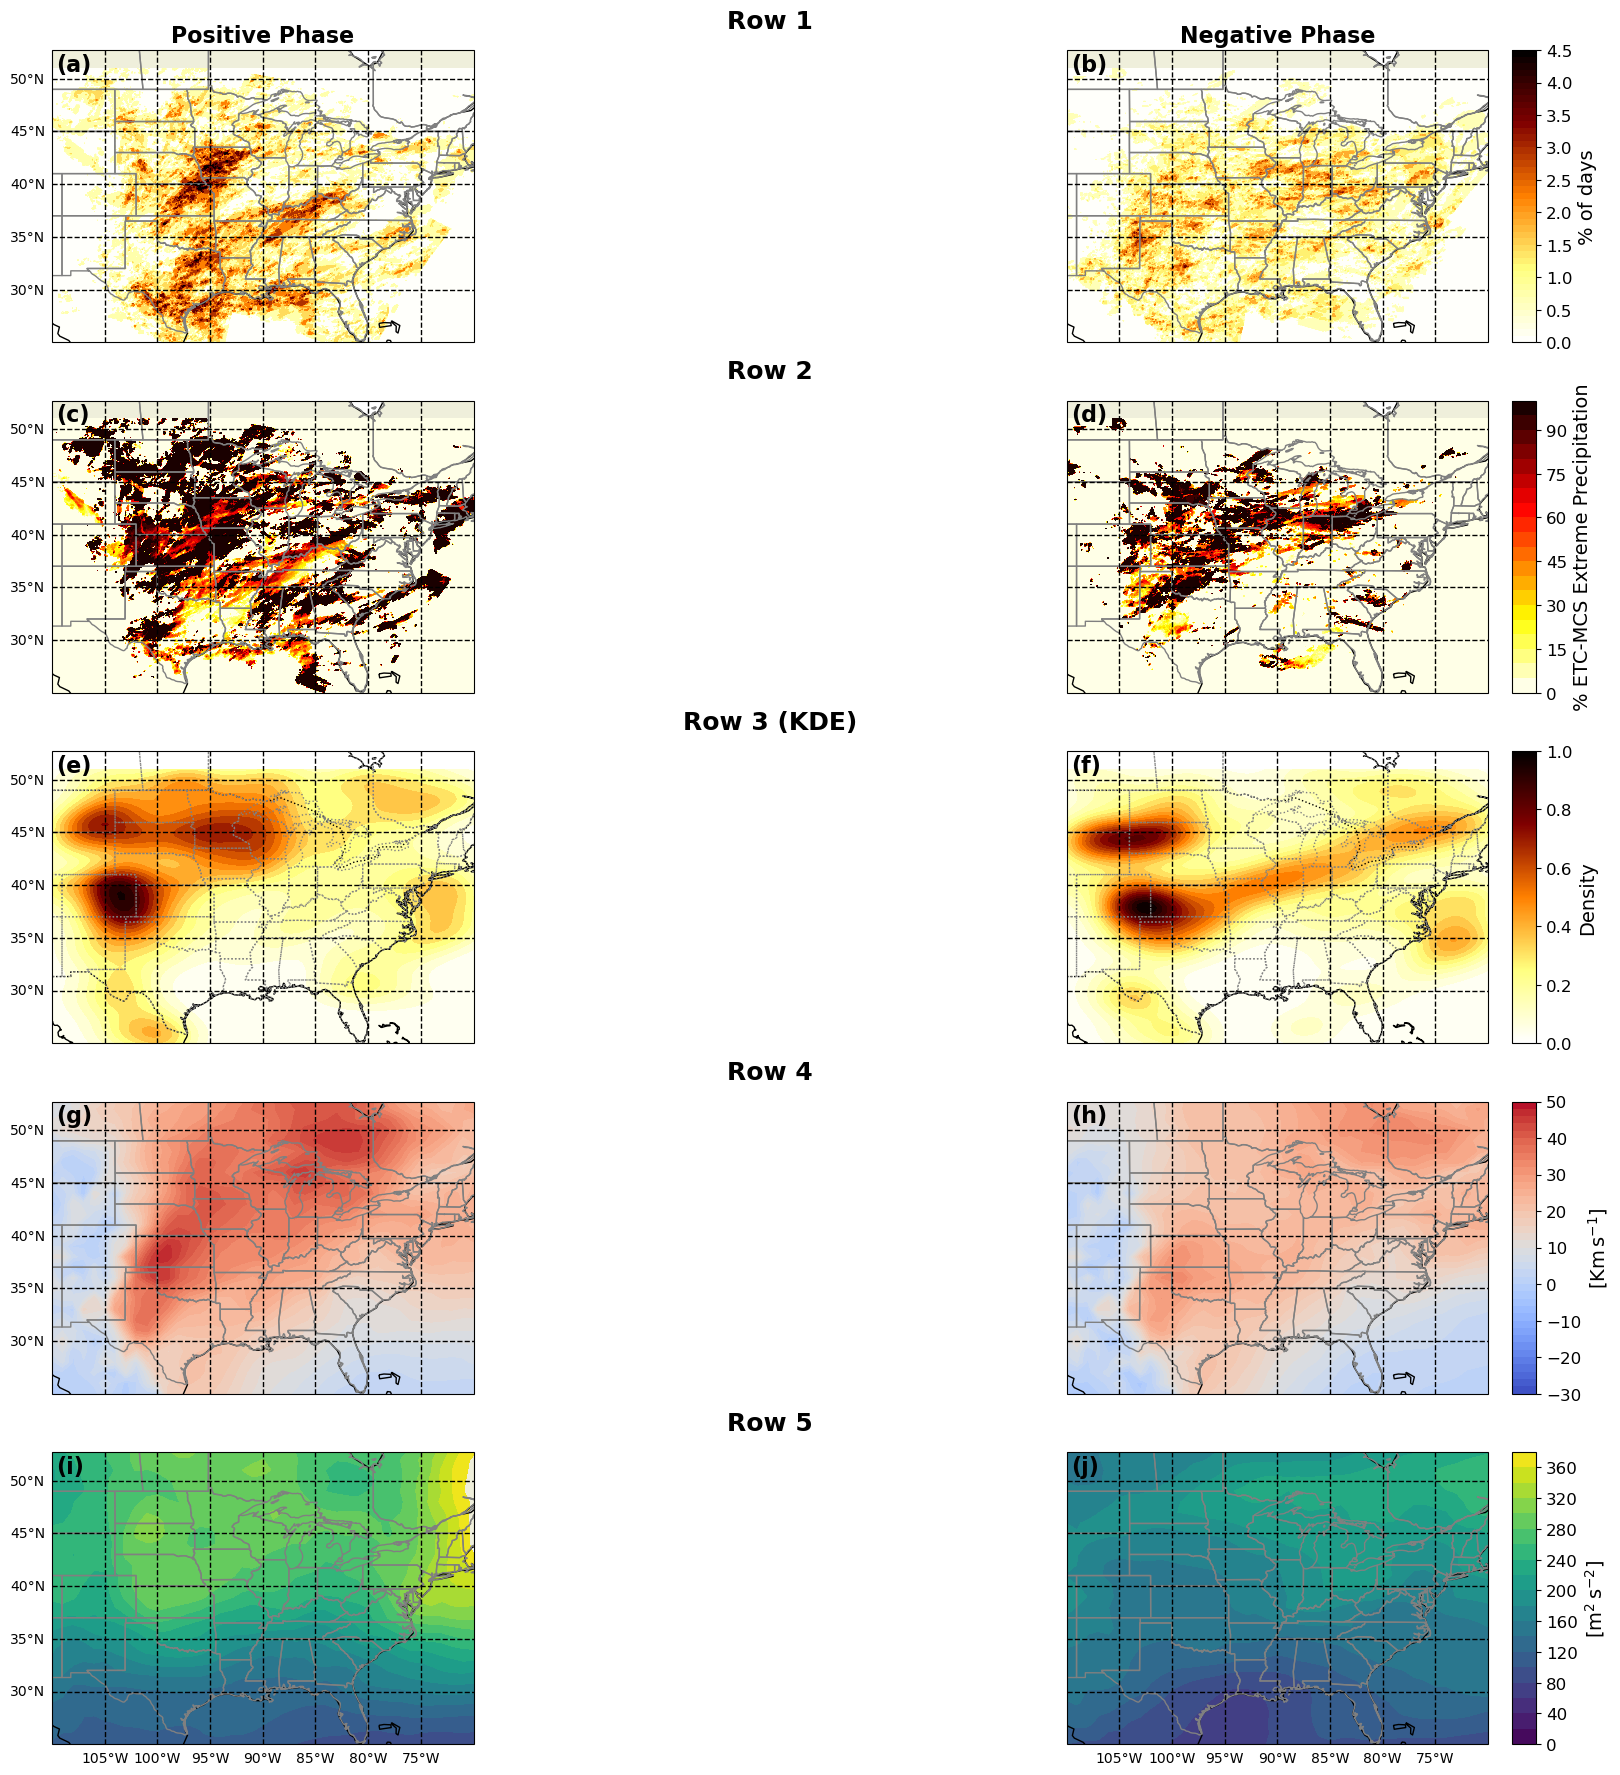

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from matplotlib.colors import Normalize

# === Define meshgrids ===
x, y = np.meshgrid(lons, lats)
x_v, y_v = np.meshgrid(lons_vt, lats_vt)

# === Set up figure and subplots ===
fig, axs = plt.subplots(5, 2, figsize=(24, 22), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)
axs = axs.flatten()

# === Contour levels ===
clevs_std_pos = np.arange(0, 4.6, 0.1)
clevs_pos_etc_con = np.arange(0, 105, 5)
clevs_vt = np.arange(-30, 52, 2)
clevs_eke = np.arange(0, 400, 20)

# === Subplot index to data mapping ===
data_plot_map = {
    0: (freq_extreme_pos_mcs, 'pos'),
    1: (freq_extreme_neg_mcs, 'neg'),
    2: (ee_con_pos, 'pos_etc'),
    3: (ee_con_neg, 'neg_etc'),
    6: (np.nanmean(vt_pos, axis=0), 'vt_pos'),
    7: (np.nanmean(vt_neg, axis=0), 'vt_neg'),
    8: (np.nanmean(eke_pos, axis=0), 'eke_pos'),
    9: (np.nanmean(eke_neg, axis=0), 'eke_neg')
}

subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']
row_titles = ['Row 1', 'Row 2', 'Row 3 (KDE)', 'Row 4', 'Row 5']
phase_titles = ['Positive Phase', 'Negative Phase']
row_keys = ['pos', 'pos_etc', 'kde', 'vt_pos', 'eke_pos']

# === Track colorbar handles per row ===
row_meshes = [None] * 5

# === Plot all non-KDE data ===
for idx, (data_array, key) in data_plot_map.items():
    ax = axs[idx]
    row_idx, col_idx = divmod(idx, 2)

    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = (row_idx == 4)
    gl.left_labels = (col_idx == 0)

    # Choose colormap and levels
    if key in ['pos_etc', 'neg_etc']:
        clevs = clevs_pos_etc_con
        mesh = ax.contourf(x, y, data_array, levels=clevs, cmap='hot_r')
    elif key in ['pos', 'neg']:
        clevs = clevs_std_pos
        mesh = ax.contourf(x, y, data_array, levels=clevs, cmap='afmhot_r')
    elif key in ['vt_pos', 'vt_neg']:
        clevs = clevs_vt
        mesh = ax.contourf(x_v, y_v, data_array, levels=clevs, cmap='coolwarm')
    elif key in ['eke_pos', 'eke_neg']:
        clevs = clevs_eke
        mesh = ax.contourf(x_v, y_v, data_array, levels=clevs, cmap='viridis')
    else:
        mesh = None

    row_meshes[row_idx] = mesh

    ax.text(0.01, 0.99, subplot_labels[idx], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left')

    if row_idx == 0:
        ax.set_title(phase_titles[col_idx], fontsize=16, fontweight='bold')

from scipy.stats import gaussian_kde

# === KDE Row (Row 3): axs[4], axs[5] ===
kde_subsets = [
    ("Positive Phase", lon_all_pos, lat_all_pos),
    ("Negative Phase", lon_neg_BI, lat_neg_BI)
]

for j, (title, lon_pts, lat_pts) in enumerate(kde_subsets):
    idx = 4 + j  # axs[4] and axs[5]
    ax = axs[idx]
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    # ax.set_extent([lonmin_b, lonmax_b, latmin_b, latmax_b], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')

    gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = (2 == 4)  # False
    gl.left_labels = (j == 0)

    if len(lon_pts) > 0 and len(lat_pts) > 0:
        # KDE estimation
        xy = np.vstack([lon_pts, lat_pts])
        kde = gaussian_kde(xy, bw_method=0.2)

        # Grid definition
        lon_grid = np.linspace(lons[0], lons[-1], 100)
        lat_grid = np.linspace(lats[0], lats[-1], 100)
        lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)
        coords = np.vstack([lon_mesh.ravel(), lat_mesh.ravel()])
        density = kde(coords).reshape(lon_mesh.shape)

        # Plot KDE as contourf
        mesh = ax.contourf(
            lon_mesh, lat_mesh, density,
            levels=20, cmap="afmhot_r", transform=ccrs.PlateCarree()
        )

        row_meshes[2] = mesh  # Save for colorbar
    #     ax.set_title(f"KDE of ETC Tracks: {title}", fontsize=14)
    # else:
    #     ax.set_title(f"{title}: No data in box", fontsize=14)

    ax.text(0.01, 0.99, subplot_labels[idx], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left')


# === Row Titles ===
for row in range(5):
    left_ax = axs[row * 2]
    right_ax = axs[row * 2 + 1]
    x0 = (left_ax.get_position().x0 + right_ax.get_position().x1) / 2
    y1 = left_ax.get_position().y1 + 0.01
    fig.text(x0, y1, row_titles[row], ha='center', fontsize=18, fontweight='bold')

# === Colorbars per row ===
for row in range(5):
    left_ax = axs[row * 2]
    right_ax = axs[row * 2 + 1]
    cax_x = right_ax.get_position().x1 + 0.01
    cax_y = left_ax.get_position().y0
    cax_h = left_ax.get_position().y1 - cax_y
    cax = fig.add_axes([cax_x, cax_y, 0.01, cax_h])

    key = row_keys[row]

    if key == 'kde':
        sm = plt.cm.ScalarMappable(cmap="afmhot_r", norm=Normalize())
        sm.set_array([])
        cb = fig.colorbar(sm, cax=cax)
        cb.set_label("Density", fontsize=14)
    else:
        cb = fig.colorbar(row_meshes[row], cax=cax, extend='max')
        if key in ['vt_pos', 'vt_neg']:
            cb.set_label(r'[$\mathrm{Km\,s^{-1}}$]', fontsize=14)
        elif key in ['eke_pos', 'eke_neg']:
            cb.set_label(r'[$\mathrm{m^{2}\,s^{-2}}$]', fontsize=14)
        elif key in ['pos_etc', 'neg_etc']:
            cb.set_label('% ETC-MCS Extreme Precipitation', fontsize=14)
        elif key in ['pos','neg']:
            cb.set_label('% of days', fontsize=14)

    cb.ax.tick_params(labelsize=12)

# === Final layout ===
plt.tight_layout()
plt.show()


# FIGURE 1

In [29]:
data = np.array(filtered_values.copy())
days_per_season = 92
season_idx = 9  # e.g., 2014
season_start = season_idx * days_per_season
season_end = season_start + days_per_season

In [30]:
# Adjust for longitudes in degrees east if needed
if np.any(lons > 180):
    lons = (lons + 180) % 360 - 180  # convert to [-180, 180]

# Define bounds
latmin_b, latmax_b = 35, 50
lonmin_b, lonmax_b = -105, -90

# Get index masks
lat_mask = (lats >= latmin_b) & (lats <= latmax_b)
lon_mask = (lons >= lonmin_b) & (lons <= lonmax_b)

# Find actual indices
lat_indices = np.where(lat_mask)[0]
lon_indices = np.where(lon_mask)[0]


In [13]:
# Extract the relevant portion for the selected season
season_total_precip = etc_array[season_start:season_end, :, :]

# Calculate the daily mean in the box for each day
daily_mean_precip = np.mean(
    season_total_precip[:, lat_indices[:, None], lon_indices], axis=(1, 2)
)

daily_max_precip = np.nanmax(
    season_total_precip[:, lat_indices[:, None], lon_indices], axis=(1, 2)
)

In [23]:
# Extract MAM precipitation data in the domain
mams_precip = total_array[:, lat_indices[:, None], lon_indices]  # shape: (1288, Nlat, Nlon)

# Compute 99th percentile across all days and all grid cells in the domain
extreme_thresh = np.percentile(mams_precip, 99,axis=0)

# Extract season data: (92, Nlat, Nlon)
season_precip = etc_array[season_start:season_end, lat_indices[:, None], lon_indices]

# Check for extremes per day (1 if any grid cell exceeds threshold, else 0)
extreme_event_flags = np.any(season_precip > extreme_thresh, axis=(1, 2)).astype(int)  # shape: (92,)


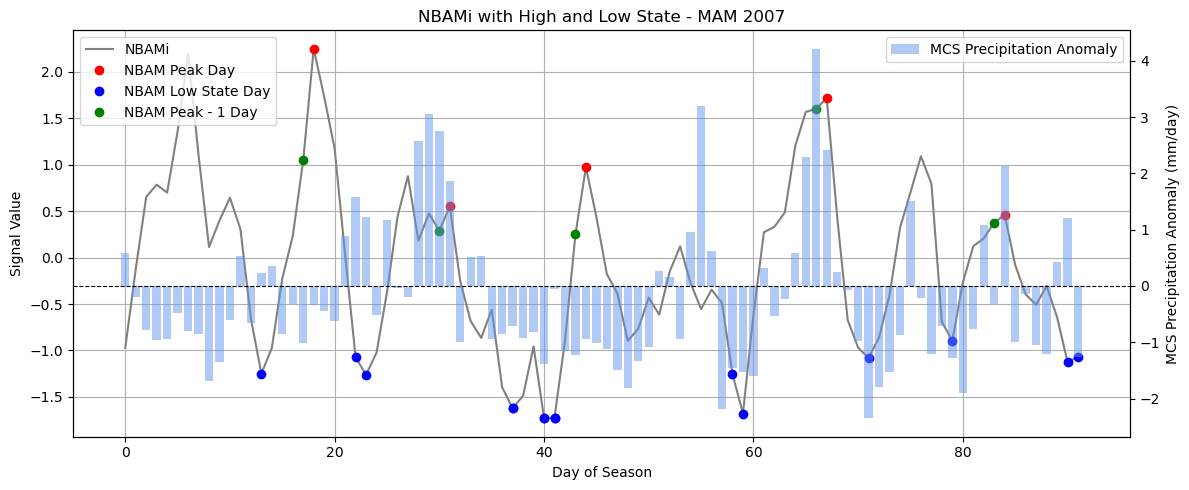

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have these variables defined already:
# filtered_values, i_series, HH, LL
# total_array (1288, 715, 1100)
# lats (715,), lons (1100,)
# season_idx, days_per_season = 92

season_idx = 3
# Define domain bounds
latmin_b, latmax_b = 30, 50
lonmin_b, lonmax_b = -105, -80

# Adjust longitudes if necessary (convert 0-360 to -180 to 180)
if np.any(lons > 180):
    lons = (lons + 180) % 360 - 180

# Get domain indices
lat_mask = (lats >= latmin_b) & (lats <= latmax_b)
lon_mask = (lons >= lonmin_b) & (lons <= lonmax_b)
lat_indices = np.where(lat_mask)[0]
lon_indices = np.where(lon_mask)[0]

# Season start/end indices for 92-day season
season_start = season_idx * days_per_season
season_end = season_start + days_per_season

# Extract season data for filtered_values
data = np.array(filtered_values.copy())
season_data = data[season_start:season_end]

# Positive and negative peak local indices relative to season
pos_local = [i - season_start for i in HH[season_idx]]
neg_local = [i - season_start for i in LL[season_idx]]

# ==== Calculate precipitation anomaly ====

# Extract MAM precip data in domain (all seasons)
mam_precip = mcs_array[:, lat_indices[:, None], lon_indices]  # shape (1288, Nlat, Nlon)

# Domain-averaged daily precip for all MAM days
mam_daily_domain_avg = np.mean(mam_precip, axis=(1, 2))  # (1288,)

# Reshape to (years, days_per_season)
mam_daily_domain_avg_reshaped = mam_daily_domain_avg.reshape((-1, days_per_season))

# Climatology mean for each day of season
mam_clim = np.mean(mam_daily_domain_avg_reshaped, axis=0)

# Current season precip and anomaly
season_precip = mam_daily_domain_avg_reshaped[season_idx]
season_anomaly = season_precip - mam_clim

# ==== Plotting ====

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot main signal
ax1.plot(season_data, label='NBAMi', color='gray')

# Plot positive and negative peaks
ax1.plot(pos_local, season_data[pos_local], 'ro', label='NBAM Peak Day',zorder=3)
ax1.plot(neg_local, season_data[neg_local], 'bo', label='NBAM Low State Day',zorder=3)

# Plot green dots one day before each positive peak (if within range)
green_dot_days = [i - 1 for i in pos_local if i - 1 >= 0]
ax1.plot(green_dot_days, season_data[green_dot_days], 'go', label='NBAM Peak - 1 Day',zorder=3)


# Customize primary axis
ax1.set_xlabel('Day of Season')
ax1.set_ylabel('Signal Value')
ax1.set_title(f'NBAMi with High and Low State - MAM {2004 + season_idx}')
ax1.grid(True)
ax1.legend(loc='upper left')

# Create secondary y-axis for precipitation anomaly bars
ax2 = ax1.twinx()
ax2.bar(np.arange(days_per_season), season_anomaly, color='cornflowerblue', alpha=0.5, label='MCS Precipitation Anomaly')
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.set_ylabel('MCS Precipitation Anomaly (mm/day)')
ax2.legend(loc='upper right')

# # Create inset axes in the top-right corner of ax1
# ax3 = fig.add_axes([0.85, 0.97, 0.4, 0.3], projection=ccrs.PlateCarree())

# ax3.add_feature(cfeature.COASTLINE, linestyle='-', alpha=0.9)
# ax3.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.9)
# ax3.add_feature(cfeature.STATES, linestyle='-', alpha=0.9)
# ax3.gridlines(draw_labels=True)



# rect2 = patches.Rectangle((lonmin_b, latmin_b), 
#                         lonmax_b - lonmin_b, 
#                         latmax_b - latmin_b, 
#                         linewidth=2, 
#                         edgecolor='r', 
#                         facecolor='none', transform=ccrs.PlateCarree())

# ax3.add_patch(rect2)
# extent = [-50, -180, 20, 70]
# ax3.set_extent(extent)
# # ax4 = fig.add_axes([0.85, 0.9, 0.4, 0.3], projection=ccrs.PlateCarree())

# ax3.add_feature(cfeature.COASTLINE, linestyle='-', alpha=1)
# ax3.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
# ax3.add_feature(cfeature.STATES, linestyle='-', alpha=1)
# ax3.gridlines(draw_labels=True)

plt.tight_layout()
plt.show()


In [ ]:
neg_date = date_list[335]
#59

In [57]:
neg_date

Timestamp('2007-04-29 00:00:00')

In [16]:
pos_date = date_list[342]
#66

Timestamp('2007-05-06 00:00:00')

In [59]:
mcs_anom = np.nanmean(mcs_array,axis=0)

pos_anom = mcs_array[342] - mcs_anom

neg_anom = mcs_array[335] - mcs_anom

/tmp/ipykernel_1117064/3730982334.py:34: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for track_idx in range(ds.dims['track']):


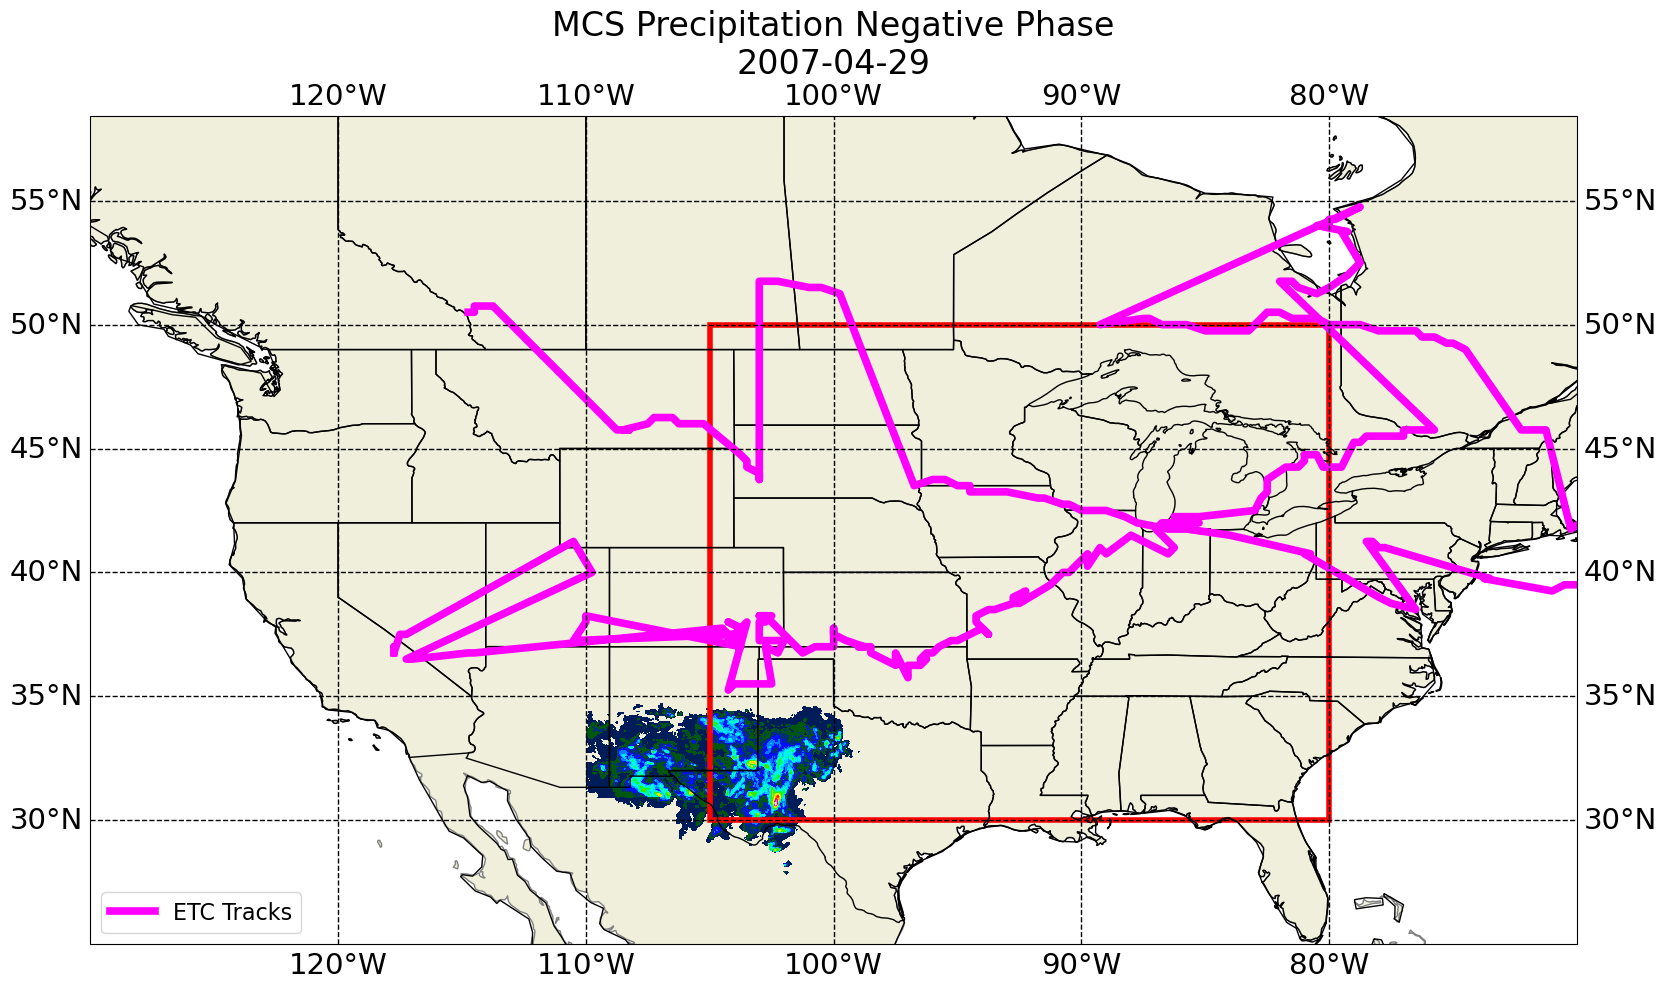

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm
latmin_b, latmax_b = 30, 50
lonmin_b, lonmax_b = -105, -80

target_day = np.datetime64("2007-04-29")
# Create meshgrid
x, y = np.float32(np.meshgrid(lons, lats))

# Define the contour levels
clevs = np.arange(0, 165, 5)

# Get a copy of the colormap and customize it
base_cmap = plt.cm.gist_ncar(np.linspace(0, 1, len(clevs)-1))

# Replace the first color (corresponding to 0) with white
base_cmap[0] = [1, 1, 1, 1]  # RGBA for white

# Create new colormap and normalization
custom_cmap = ListedColormap(base_cmap)
norm = BoundaryNorm(clevs, ncolors=custom_cmap.N)

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and map features
ax1.set_extent([-130, lonmax_b+10, 25, 55])
ax1.coastlines(resolution="110m", linewidth=1)
ax1.add_feature(cfeature.STATES, edgecolor='black')
ax1.add_feature(cfeature.LAND, edgecolor='grey')
for track_idx in range(ds.dims['track']):
    time_on_day = ds['time'].isel(track=track_idx).dt.floor('D') == target_day

    # If the track exists at any time on the target day
    if time_on_day.any():
        # Plot the *full* track (remove NaNs)
        lats_e = ds['lat'].isel(track=track_idx).dropna('time_step')
        lons_e = ds['lon'].isel(track=track_idx).dropna('time_step')

        if lats_e.size >= 2:
            ax1.plot(lons_e, lats_e, transform=ccrs.PlateCarree(), color='magenta', linewidth=5.5)
# Gridlines
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
from matplotlib import font_manager

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True

# Set font size for grid labels
gl.xlabel_style = {'size': 21, 'color': 'black'}
gl.ylabel_style = {'size': 21, 'color': 'black'}

gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
masked_data = np.ma.masked_equal(mcs_array[335], 0)
mesh1 = ax1.contourf(x, y, masked_data, levels=clevs, cmap=plt.cm.gist_ncar, extend='max')
# Create a custom legend line for ETC tracks
etc_legend_line = mlines.Line2D([], [], color='magenta', linewidth=5.5, label='ETC Tracks')

# Add the legend to the plot
ax1.legend(handles=[etc_legend_line], loc='lower left', fontsize=16)

rect2 = patches.Rectangle((lonmin_b, latmin_b), 
                        lonmax_b - lonmin_b, 
                        latmax_b - latmin_b, 
                        linewidth=4, 
                        edgecolor='r', 
                        facecolor='none', transform=ccrs.PlateCarree())

ax1.add_patch(rect2)
# Contourf with custom colormap
# mesh1 = ax1.contourf(x, y, mcs_array[335], levels=clevs, cmap=custom_cmap, norm=norm, extend='max')

# Colorbar
# cb1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", pad=0.05, aspect=16, shrink=0.7)
# cb1.set_label('mm/day', size=20)
# cb1.ax.tick_params(labelsize=16)
ax1.set_title('MCS Precipitation Negative Phase\n2007-04-29', size=24)

plt.tight_layout()
plt.show()


/tmp/ipykernel_1117064/2193501057.py:35: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for track_idx in range(ds.dims['track']):


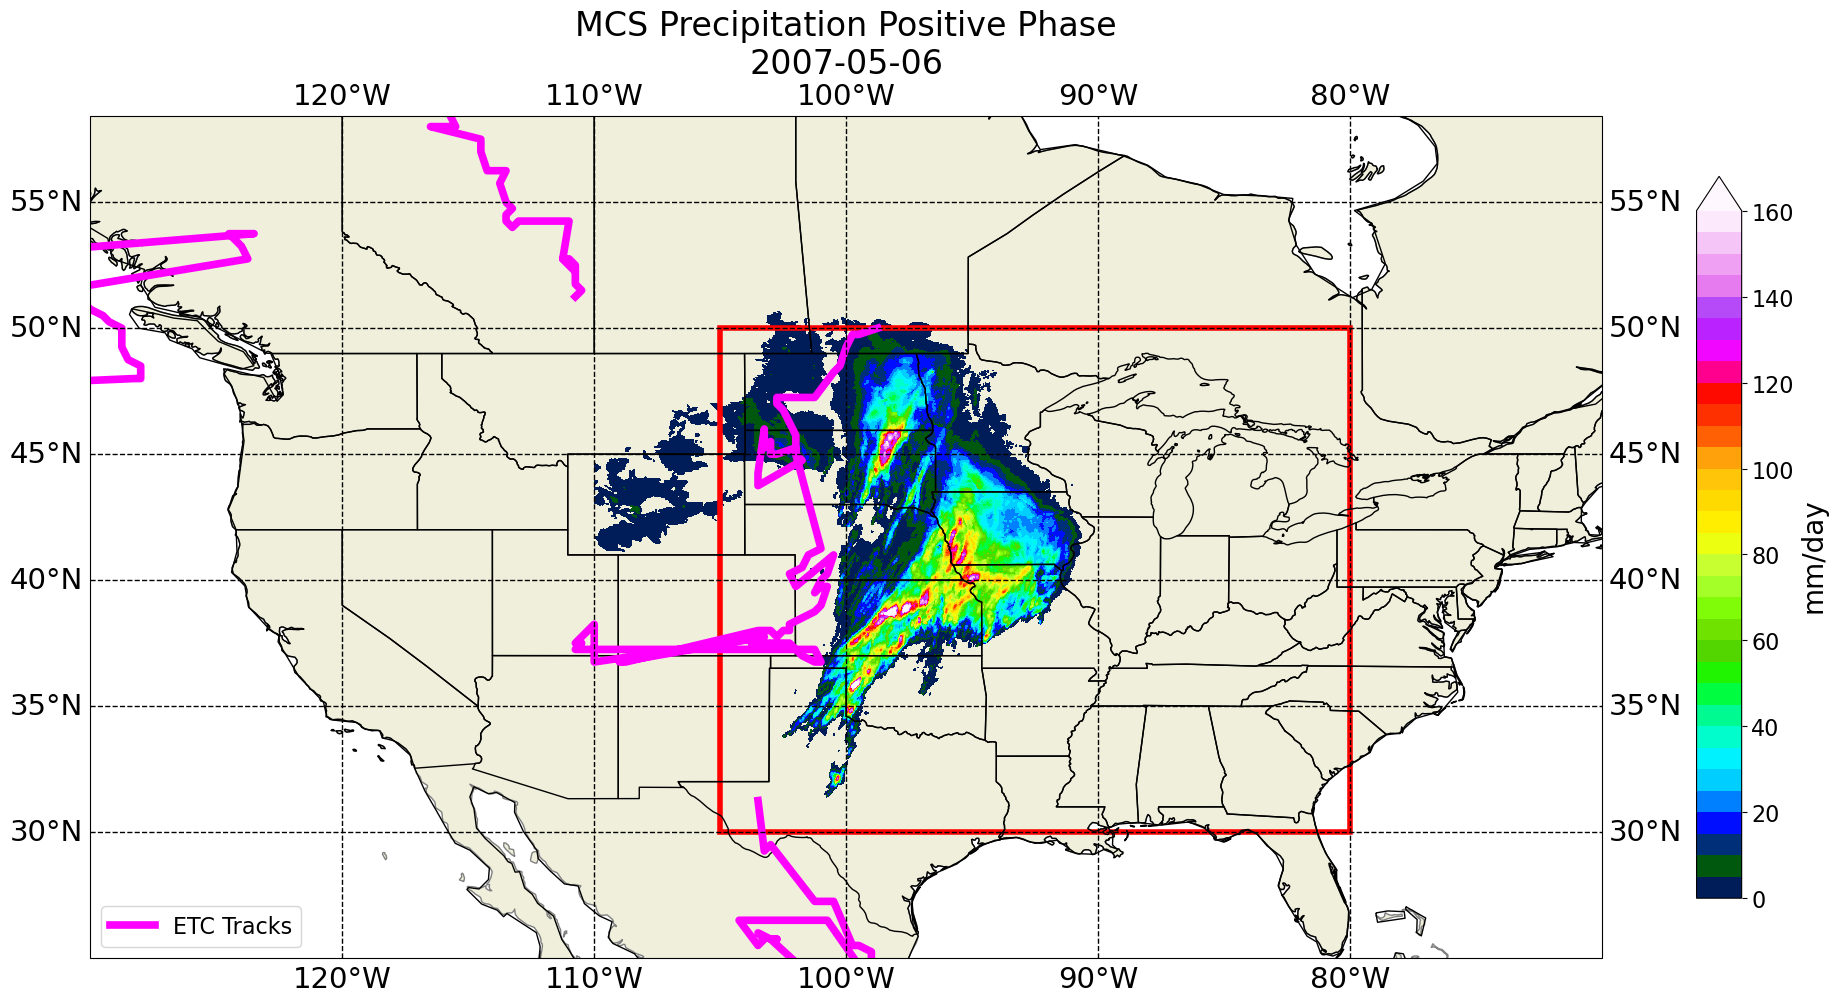

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.lines as mlines

# Create meshgrid
x, y = np.float32(np.meshgrid(lons, lats))

# Define the contour levels
clevs = np.arange(0, 165, 5)

# Get a copy of the colormap and customize it
base_cmap = plt.cm.gist_ncar(np.linspace(0, 1, len(clevs)-1))

# Replace the first color (corresponding to 0) with white
base_cmap[0] = [1, 1, 1, 1]  # RGBA for white

# Create new colormap and normalization
custom_cmap = ListedColormap(base_cmap)
norm = BoundaryNorm(clevs, ncolors=custom_cmap.N)

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and map features
ax1.set_extent([-130, lonmax_b+10, 25, 55])
ax1.coastlines(resolution="110m", linewidth=1)
ax1.add_feature(cfeature.STATES, edgecolor='black')
ax1.add_feature(cfeature.LAND, edgecolor='grey')
# ax1.plot(matching_lons.values, matching_lats.values,
#          marker='o', linestyle='None', markersize=6,
#          color='black', transform=ccrs.PlateCarree(), label="ETC Tracks")
for track_idx in range(ds.dims['track']):
    time_on_day = ds['time'].isel(track=track_idx).dt.floor('D') == target_day

    # If the track exists at any time on the target day
    if time_on_day.any():
        # Plot the *full* track (remove NaNs)
        lats_e = ds['lat'].isel(track=track_idx).dropna('time_step')
        lons_e = ds['lon'].isel(track=track_idx).dropna('time_step')

        if lats_e.size >= 2:
            ax1.plot(lons_e, lats_e, transform=ccrs.PlateCarree(), color='magenta', linewidth=5.5)
# Gridlines
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True

# Set font size for grid labels
gl.xlabel_style = {'size': 21, 'color': 'black'}
gl.ylabel_style = {'size': 21, 'color': 'black'}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True

masked_data = np.ma.masked_equal(mcs_array[342], 0)
mesh1 = ax1.contourf(x, y, masked_data, levels=clevs, cmap=plt.cm.gist_ncar, extend='max')


rect2 = patches.Rectangle((lonmin_b, latmin_b), 
                        lonmax_b - lonmin_b, 
                        latmax_b - latmin_b, 
                        linewidth=4, 
                        edgecolor='r', 
                        facecolor='none', transform=ccrs.PlateCarree())

# Create a custom legend line for ETC tracks
etc_legend_line = mlines.Line2D([], [], color='magenta', linewidth=5.5, label='ETC Tracks')

# Add the legend to the plot
ax1.legend(handles=[etc_legend_line], loc='lower left', fontsize=16)

ax1.add_patch(rect2)
# Contourf with custom colormap
# mesh1 = ax1.contourf(x, y, mcs_array[342], levels=clevs, cmap=custom_cmap, norm=norm, extend='max')

# Colorbar
cb1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb1.set_label('mm/day', size=20)
cb1.ax.tick_params(labelsize=16)
ax1.set_title('MCS Precipitation Positive Phase\n2007-05-06', size=24)

plt.tight_layout()
plt.show()


---

In [26]:
# Extract MAM precipitation data in the domain
mams_precip = total_array[:, lat_indices[:, None], lon_indices]  # shape: (1288, Nlat, Nlon)

# Compute 99th percentile across all days and all grid cells in the domain
extreme_thresh = np.percentile(mams_precip, 99,axis=0)


# Initialize counters
total_pos_phase_days = 0
total_neg_phase_days = 0
total_extreme_on_pos = 0
total_extreme_on_neg = 0

for season_idx in range(14):  # For all 14 MAM seasons

    # Season range
    season_start = season_idx * days_per_season
    season_end = season_start + days_per_season

    # Precip for this season
    season_domain_precip = mcs_array[season_start:season_end, lat_indices[:, None], lon_indices]
    exceed_mask = season_domain_precip > extreme_thresh
    fraction_exceed = exceed_mask.reshape(season_domain_precip.shape[0], -1).mean(axis=1)
    extreme_event_flags = (fraction_exceed >= 0.02).astype(int)
    extreme_days = np.where(extreme_event_flags == 1)[0]  # relative to season

    # Get positive and negative peak indices (relative to season)
    pos_local = [i - season_start for i in HH[season_idx]]
    neg_local = [i - season_start for i in LL[season_idx]]
    green_dot_days = [i - 1 for i in pos_local if i - 1 >= 0]

    # Positive phase = peak days + peak-1 days
    pos_phase_set = set(pos_local).union(set(green_dot_days))
    neg_phase_set = set(neg_local)
    extreme_set = set(extreme_days)

    # Count totals
    total_pos_phase_days += len(pos_phase_set)
    total_neg_phase_days += len(neg_phase_set)

    # Count overlaps with extreme days
    total_extreme_on_pos += len(extreme_set.intersection(pos_phase_set))
    total_extreme_on_neg += len(extreme_set.intersection(neg_phase_set))

# Final conditional probabilities
p_extreme_given_positive = total_extreme_on_pos / total_pos_phase_days if total_pos_phase_days > 0 else np.nan
p_extreme_given_negative = total_extreme_on_neg / total_neg_phase_days if total_neg_phase_days > 0 else np.nan

print(f"Overall P(Extreme MCS precip in 2% of domain| Positive Phase): {p_extreme_given_positive:.3f}")
print(f"Overall P(Extreme MCS precip in 2% of domain| Negative Phase): {p_extreme_given_negative:.3f}")


Overall P(Extreme MCS precip in 2% of domain| Positive Phase): 0.140
Overall P(Extreme MCS precip in 2% of domain| Negative Phase): 0.066


In [50]:
# Extract domain precipitation
mam_precip = mcs_array[:, lat_indices[:, None], lon_indices]  # shape: (1288, Nlat, Nlon)

# Daily domain average precipitation
mam_daily_domain_avg = np.mean(mam_precip, axis=(1, 2))  # shape: (1288,)

# Reshape to (years, days_per_season)
mam_daily_reshaped = mam_daily_domain_avg.reshape((-1, days_per_season))  # (14, 92)

# Compute MAM climatology for each day of season
mam_clim = np.mean(mam_daily_reshaped, axis=0)  # (92,)

# Initialize counters
total_pos_phase_days = 0
total_neg_phase_days = 0
total_pos_anom_on_pos = 0
total_pos_anom_on_neg = 0

for season_idx in range(14):
    # Extract this season's daily average precip
    season_precip = mam_daily_reshaped[season_idx]  # (92,)
    
    # Daily anomaly = actual - climatology
    season_anomaly = season_precip - mam_clim  # (92,)
    
    # Positive anomaly: anomaly > 0
    pos_anom_days = np.where(season_anomaly > 0)[0]
    pos_anom_set = set(pos_anom_days)

    # Get phase days (relative to season)
    pos_local = [i - season_idx * days_per_season for i in HH[season_idx]]
    neg_local = [i - season_idx * days_per_season for i in LL[season_idx]]
    green_dot_days = [i - 1 for i in pos_local if i - 1 >= 0]

    # Construct day sets
    pos_phase_set = set(pos_local).union(set(green_dot_days))
    neg_phase_set = set(neg_local)

    # Count total days in each phase
    total_pos_phase_days += len(pos_phase_set)
    total_neg_phase_days += len(neg_phase_set)

    # Count overlaps with positive anomaly days
    total_pos_anom_on_pos += len(pos_anom_set.intersection(pos_phase_set))
    total_pos_anom_on_neg += len(pos_anom_set.intersection(neg_phase_set))

# Final conditional probabilities
p_anom_given_pos = total_pos_anom_on_pos / total_pos_phase_days if total_pos_phase_days > 0 else np.nan
p_anom_given_neg = total_pos_anom_on_neg / total_neg_phase_days if total_neg_phase_days > 0 else np.nan

print(f"P(Positive Precip Anomaly | Positive Phase): {p_anom_given_pos:.3f}")
print(f"P(Positive Precip Anomaly | Negative Phase): {p_anom_given_neg:.3f}")


P(Positive Precip Anomaly | Positive Phase): 0.353
P(Positive Precip Anomaly | Negative Phase): 0.323


---
# ETC TRANSLATION

In [12]:
# Convert the list of timestamps to numpy datetime64 format
timestamps_pos = np.array(all_pos, dtype='datetime64[D]')
timestamps_neg = np.array(neg_BI_dates, dtype='datetime64[D]')
# timestamps = np.array([ts.normalize() for ts in timestamps], dtype='datetime64[ns]')
base_time = ds['time']

base_time_normalized = base_time.values.astype('datetime64[D]')
# Convert the 'base_time' values to numpy datetime64 format if they are not already
base_time_values = base_time.values
# Create a mask to check if the date part of base_time is in the target dates

mask_pos = np.isin(base_time_normalized, timestamps_pos)
mask_neg = np.isin(base_time_normalized, timestamps_neg)
mask_da_pos = xr.DataArray(mask_pos, coords=base_time.coords, dims=base_time.dims)
mask_da_neg = xr.DataArray(mask_neg, coords=base_time.coords, dims=base_time.dims)

# Filter the dataset using the mask
ds_pos = ds.where(mask_da_pos, drop=True)
ds_neg =  ds.where(mask_da_neg,drop = True)



In [56]:
import numpy as np
import xarray as xr
# latmin_b = 30
# latmax_b = 50
# lonmin_b = -105
# lonmax_b = -80
# Define your lat-lon bounds (e.g., a box)
lat_min, lat_max = 30,50  # example values
lon_min, lon_max = -105, -80  # example values

# Convert timestamps to numpy datetime64[D]
timestamps_pos = np.array(all_pos, dtype='datetime64[D]')
timestamps_neg = np.array(neg_BI_dates, dtype='datetime64[D]')

# Extract and normalize time to day resolution
time_normalized = ds['time'].values.astype('datetime64[D]')

# Build time masks
mask_time_pos = np.isin(time_normalized, timestamps_pos)
mask_time_neg = np.isin(time_normalized, timestamps_neg)

# Build lat-lon masks
mask_lat = (ds['lat'].values >= lat_min) & (ds['lat'].values <= lat_max)
mask_lon = (ds['lon'].values >= lon_min) & (ds['lon'].values <= lon_max)

# Combine all conditions
mask_pos = mask_time_pos & mask_lat & mask_lon
mask_neg = mask_time_neg & mask_lat & mask_lon

# Wrap as DataArray with proper coords/dims
mask_da_pos = xr.DataArray(mask_pos, coords=ds['time'].coords, dims=ds['time'].dims)
mask_da_neg = xr.DataArray(mask_neg, coords=ds['time'].coords, dims=ds['time'].dims)

# Apply masks
ds_pos = ds.where(mask_da_pos,drop=True)  # Drop=False to keep structure; you can drop afterward
ds_neg = ds.where(mask_da_neg,drop=True)


In [57]:
etrack_pos = ds.sel(track = ds.track.isin(ds_pos.track.values))
etrack_neg = ds.sel(track=ds.track.isin(ds_neg.track.values))


In [37]:
import numpy as np
import xarray as xr

# Radius of the Earth in kilometers
R = 6371.0

# Extract lat/lon from dataset
lat = etrack_pos['lat'].values  # shape (track, time_step)
lon = etrack_pos['lon'].values

# Convert degrees to radians
lat_rad = np.radians(lat)
lon_rad = np.radians(lon)

# Differences between consecutive time steps
dlat = lat_rad[:, 1:] - lat_rad[:, :-1]
dlon = lon_rad[:, 1:] - lon_rad[:, :-1]

# Haversine formula
a = np.sin(dlat / 2)**2 + np.cos(lat_rad[:, :-1]) * np.cos(lat_rad[:, 1:]) * np.sin(dlon / 2)**2
c = 2 * np.arcsin(np.sqrt(a))
distance_km = R * c  # shape (track, time_step-1)


In [86]:
import numpy as np
import xarray as xr

def compute_translation_speed(ds):
    R = 6371.0  # Earth radius in km

    lat = ds['lat'].values
    lon = ds['lon'].values

    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)

    dlat = lat_rad[:, 1:] - lat_rad[:, :-1]
    dlon = lon_rad[:, 1:] - lon_rad[:, :-1]

    a = np.sin(dlat / 2)**2 + np.cos(lat_rad[:, :-1]) * np.cos(lat_rad[:, 1:]) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance_km = R * c

    # Mask invalid movements (where lat/lon were NaN)
    valid_mask = ~np.isnan(ds['lat'].values[:, 1:]) & ~np.isnan(ds['lat'].values[:, :-1])
    distance_km[~valid_mask] = np.nan

    return xr.DataArray(
        distance_km,
        dims=['track', 'time_step'],
        coords={
            'track': ds.track,
            'time_step': ds.time_step.isel(time_step=slice(1, None))
        }
    )


In [100]:
aa = compute_translation_speed(etrack_pos.isel(track=slice(0,2)))

In [101]:
aa

<xarray.DataArray (track: 2, time_step: 932)> Size: 15kB
array([[  0.        ,   0.        ,   0.        , ...,          nan,
                 nan,          nan],
       [660.32174179,  35.32295706,  43.66157616, ...,          nan,
                 nan,          nan]])
Coordinates:
  * track      (track) int64 16B 5007 5021
  * time_step  (time_step) int64 7kB 1 2 3 4 5 6 7 ... 927 928 929 930 931 932

In [113]:
speed_pos = compute_translation_speed(me_track_pos)
speed_neg = compute_translation_speed(me_track_neg)


In [114]:
speed_pos

<xarray.DataArray (track: 29, time_step: 932)> Size: 216kB
array([[  0.        ,   0.        , 921.939805  , ...,          nan,
                 nan,          nan],
       [ 78.96851396,  19.74224492,  48.21864183, ...,          nan,
                 nan,          nan],
       [ 39.65485387,  48.49752156,  59.73664888, ...,          nan,
                 nan,          nan],
       ...,
       [ 33.62316144, 116.83875863,  27.79873166, ...,          nan,
                 nan,          nan],
       [ 67.89397305, 250.15030587,   0.        , ...,          nan,
                 nan,          nan],
       [ 35.18289061,   0.        ,  35.13590242, ...,          nan,
                 nan,          nan]])
Coordinates:
  * track      (track) int64 232B 5051 5221 5230 5240 ... 7453 7631 7660 7689
  * time_step  (time_step) int64 7kB 1 2 3 4 5 6 7 ... 927 928 929 930 931 932

In [97]:
print(etrack_pos.isel(track=0,time_step = slice(0,10)).lon.values)
print(etrack_pos.isel(track=0,time_step = slice(0,10)).lat.values)

[-117.   -117.   -117.   -117.   -117.   -117.   -117.   -115.25 -111.25
 -111.25]
[36.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5 35.5 35.5]


In [115]:
mean_speed_pos = speed_pos.mean(dim='time_step', skipna=True)
mean_speed_neg = speed_neg.mean(dim='time_step', skipna=True)


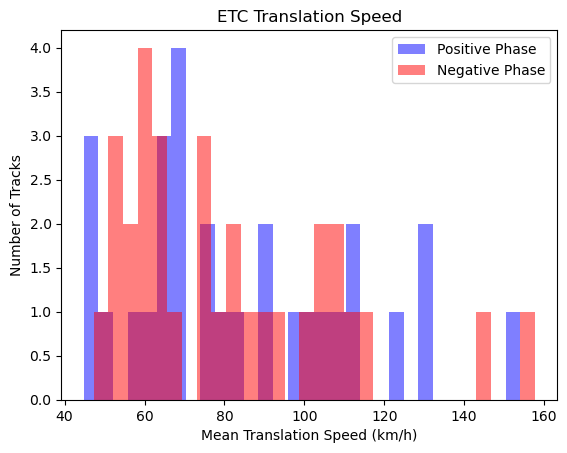

In [116]:
import matplotlib.pyplot as plt

plt.hist(mean_speed_pos.values, bins=30, alpha=0.5, label='Positive Phase', color='blue')
plt.hist(mean_speed_neg.values, bins=30, alpha=0.5, label='Negative Phase', color='red')
plt.xlabel('Mean Translation Speed (km/h)')
plt.ylabel('Number of Tracks')
plt.legend()
plt.title('ETC Translation Speed')
plt.show()


In [42]:
def get_midpoint_latlon(ds):
    lat = ds['lat'].values
    lon = ds['lon'].values
    lat_mid = (lat[:, 1:] + lat[:, :-1]) / 2
    lon_mid = (lon[:, 1:] + lon[:, :-1]) / 2
    return lat_mid, lon_mid
def prepare_speed_grid(speed, lat_mid, lon_mid, lat_bins, lon_bins):
    # Flatten
    flat_speed = speed.values.flatten()
    flat_lat = lat_mid.flatten()
    flat_lon = lon_mid.flatten()

    # Remove NaNs
    valid = ~np.isnan(flat_speed) & ~np.isnan(flat_lat) & ~np.isnan(flat_lon)
    flat_speed = flat_speed[valid]
    flat_lat = flat_lat[valid]
    flat_lon = flat_lon[valid]

    # Digitize into bins
    lat_idx = np.digitize(flat_lat, lat_bins) - 1
    lon_idx = np.digitize(flat_lon, lon_bins) - 1

    # Create 2D grid to hold mean speeds
    speed_grid = np.full((len(lat_bins) - 1, len(lon_bins) - 1), np.nan)
    count_grid = np.zeros_like(speed_grid, dtype=int)

    for s, i, j in zip(flat_speed, lat_idx, lon_idx):
        if 0 <= i < speed_grid.shape[0] and 0 <= j < speed_grid.shape[1]:
            if np.isnan(speed_grid[i, j]):
                speed_grid[i, j] = s
            else:
                speed_grid[i, j] += s
            count_grid[i, j] += 1

    # Average where count > 0
    with np.errstate(invalid='ignore'):
        speed_grid = speed_grid / count_grid
    return speed_grid


In [43]:
# Define lat/lon bins
lat_bins = np.arange(30, 50, 2)
lon_bins = np.arange(-105, -80, 2)

# POSITIVE
lat_mid_pos, lon_mid_pos = get_midpoint_latlon(etrack_pos)
speed_grid_pos = prepare_speed_grid(speed_pos, lat_mid_pos, lon_mid_pos, lat_bins, lon_bins)

# NEGATIVE
lat_mid_neg, lon_mid_neg = get_midpoint_latlon(etrack_neg)
speed_grid_neg = prepare_speed_grid(speed_neg, lat_mid_neg, lon_mid_neg, lat_bins, lon_bins)


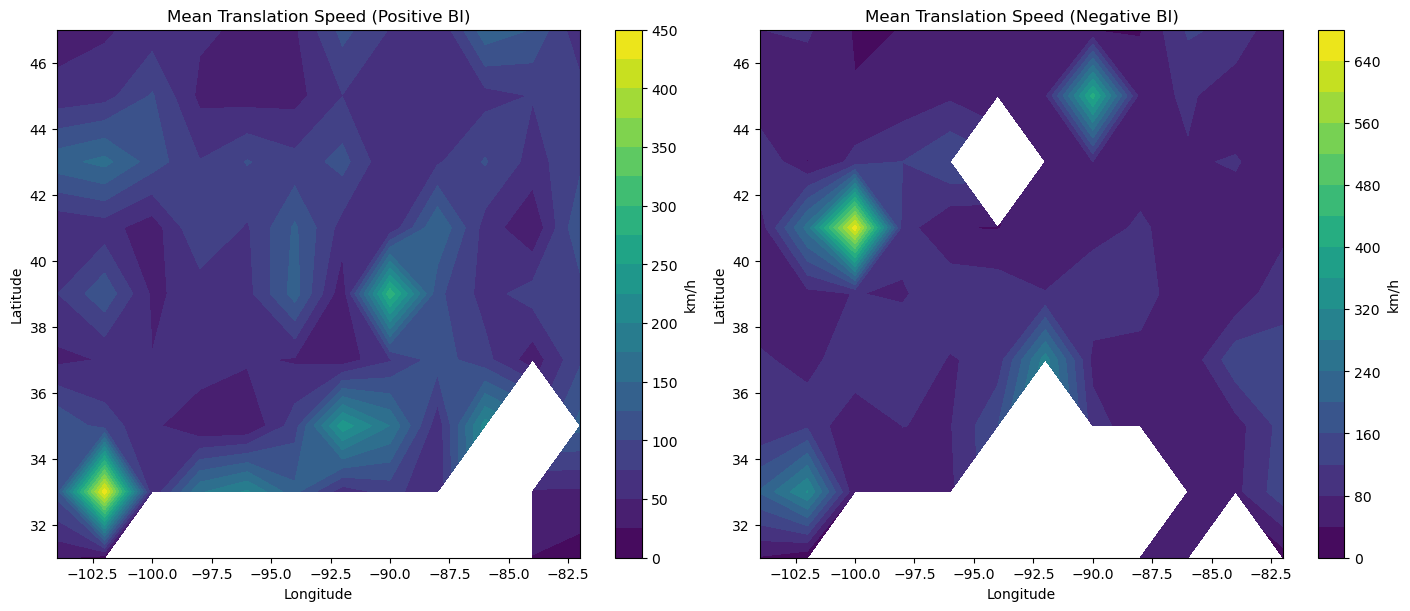

In [44]:
import matplotlib.pyplot as plt

lon_centers = (lon_bins[:-1] + lon_bins[1:]) / 2
lat_centers = (lat_bins[:-1] + lat_bins[1:]) / 2
Lon, Lat = np.meshgrid(lon_centers, lat_centers)

fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

cf1 = axs[0].contourf(Lon, Lat, speed_grid_pos, levels=20, cmap='viridis')
axs[0].set_title("Mean Translation Speed (Positive BI)")
axs[0].set_xlabel("Longitude")
axs[0].set_ylabel("Latitude")
plt.colorbar(cf1, ax=axs[0], label="km/h")

cf2 = axs[1].contourf(Lon, Lat, speed_grid_neg, levels=20, cmap='viridis')
axs[1].set_title("Mean Translation Speed (Negative BI)")
axs[1].set_xlabel("Longitude")
axs[1].set_ylabel("Latitude")
plt.colorbar(cf2, ax=axs[1], label="km/h")

plt.show()


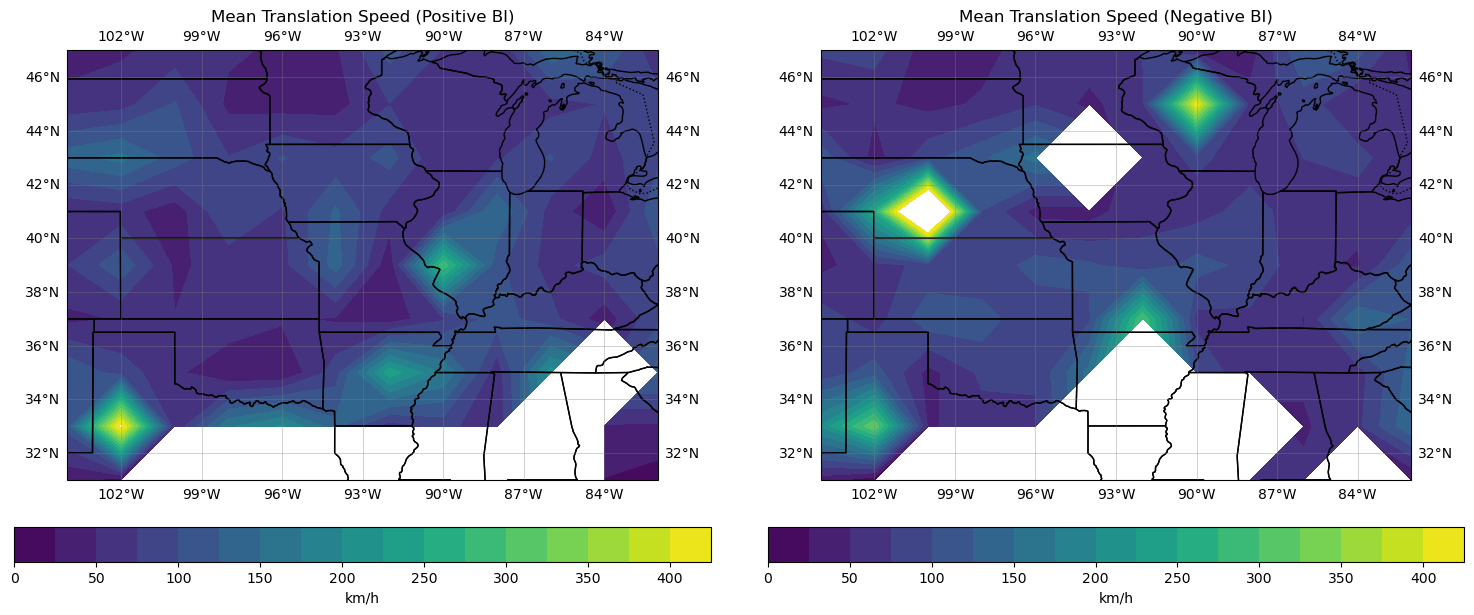

In [117]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Centers for plotting
lon_centers = (lon_bins[:-1] + lon_bins[1:]) / 2
lat_centers = (lat_bins[:-1] + lat_bins[1:]) / 2
Lon, Lat = np.meshgrid(lon_centers, lat_centers)
levels = np.arange(0,450,25)
# Create figure with PlateCarree projection
fig, axs = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

# --- Plot 1: Positive BI ---
cf1 = axs[0].contourf(
    Lon, Lat, speed_grid_pos,
    levels=levels, cmap='viridis', transform=ccrs.PlateCarree()
)
axs[0].set_title("Mean Translation Speed (Positive BI)")
axs[0].add_feature(cfeature.STATES)
axs[0].add_feature(cfeature.BORDERS, linestyle=':')
axs[0].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
plt.colorbar(cf1, ax=axs[0], orientation='horizontal', pad=0.05, label='km/h')

# --- Plot 2: Negative BI ---
cf2 = axs[1].contourf(
    Lon, Lat, speed_grid_neg,
    levels=levels, cmap='viridis', transform=ccrs.PlateCarree()
)
axs[1].set_title("Mean Translation Speed (Negative BI)")
axs[1].add_feature(cfeature.STATES)
axs[1].add_feature(cfeature.BORDERS, linestyle=':')
axs[1].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
plt.colorbar(cf2, ax=axs[1], orientation='horizontal', pad=0.05, label='km/h')

plt.show()
